### Obesity Prediction Dataset Exploratory Data Analysis

Analyze lifestyle habits and predict obesity levels with real and synthetic data.

O objetivo:
 - Identificar padrões indicativos de obesidade.
 - Identificar correlações entre as variáveis. (Correlation Heatmap)

Fonte: https://www.kaggle.com/datasets/adeniranstephen/obesity-prediction-dataset?resource=download

Referências: https://www.kaggle.com/code/miadul/obesity-level-prediction-exploring-lifestyle-fact

---
### 🧑🏻‍💻 About the Author

Nome: Carlos Eduardo Nascimento Morais

Ocupação: Discente no curso Ciências & Tecnologia.

Universidade: Escola de Ciências & Tecnologia / Universidade Federal do Rio Grande do Norte

---



# 1. Preparando ambiente de trabalho:
 - Importação das bibliotecas uttilizadas.
 - Acessar o arquivo do DATASET selecionado.
 - Criando dataframe a partir do arquivo CSV.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statsmodels.graphics.mosaicplot import mosaic
from collections import OrderedDict

file_id = '1xhPhpcV1kgrQ4EMsDReGQezCDwJIdsZk'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

df = pd.read_csv(download_url)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


# 2. Analise preliminar dos dados.
 - Descobrir se existem valores nulos.
 - Identificar variáveis quantitativas e qualitativas.
 - Descrever as variáveis quantitativas com medidas estatisticas.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Nosso dataset possui:
- 2111 linhas
- 0 valores nulos  
- 8 variaveis quantitativas
- 9 variaveis qualitativas




In [9]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Traduzindo Labels do DataSet


In [10]:
# Dicionário de substituições
substituicoes = {
    'Female': 'Feminino',
    'Male': 'Masculino',
    'no': 'Não',
    'yes': 'Sim',
    'Sometimes' : 'Raramente',
    'Frequently' : 'Frequentemente',
    'Always' : 'Sempre',
    'Public_Transportation': 'Transporte Público',
    'Walking': 'Caminhada',
    'Automobile': 'Automóvel',
    'Motorbike': 'Motocicleta',
    'Bike': 'Bicicleta',
    'Insufficient_Weight': 'Peso Insuficiente',
    'Normal_Weight': 'Peso Normal',
    'Overweight_Level_I': 'Sobrepeso Nível I',
    'Overweight_Level_II': 'Sobrepeso Nível II',
    'Obesity_Type_I': 'Obesidade Tipo I',
    'Obesity_Type_II': 'Obesidade Tipo II',
    'Obesity_Type_III': 'Obesidade Tipo III',
}
# Aplica as substituições em todo o DataFrame
df.replace(substituicoes, inplace=True)

traducao_colunas = {
    'Gender': 'Gênero',
    'Age': 'Idade',
    'Height': 'Altura (m)',
    'Weight': 'Peso (kg)',
    'family_history_with_overweight': 'Histórico Familiar de Sobrepeso',
    'FAVC': 'Consumo Frequente de Alimentos Calóricos',
    'FCVC': 'Frequência de Consumo de Verduras',
    'NCP': 'Número de Refeições Principais por Dia',
    'CAEC': 'Consumo Entre Refeições',
    'SMOKE': 'Fumante',
    'CH2O': 'Consumo Diário de Água',
    'SCC': 'Controle de Calorias',
    'FAF': 'Frequência de Atividade Física',
    'TUE': 'Tempo em Tecnologias',
    'CALC': 'Consumo de Álcool',
    'MTRANS': 'Meio de Transporte Principal',
    'NObeyesdad': 'Nível de Obesidade',
}
df.rename(columns=traducao_colunas, inplace=True)
df.head()

,Gênero,Idade,Altura (m),Peso (kg),Histórico Familiar de Sobrepeso,Consumo Frequente de Alimentos Calóricos,Frequência de Consumo de Verduras,Número de Refeições Principais por Dia,Consumo Entre Refeições,Fumante,Consumo Diário de Água,Controle de Calorias,Frequência de Atividade Física,Tempo em Tecnologias,Consumo de Álcool,Meio de Transporte Principal,Nível de Obesidade
0,Feminino,21,1.62,64.0,Sim,Não,2.0,3.0,Raramente,Não,2.0,Não,0.0,1.0,Não,Transporte Público,Peso Normal
1,Feminino,21,1.52,56.0,Sim,Não,3.0,3.0,Raramente,Sim,3.0,Sim,3.0,0.0,Raramente,Transporte Público,Peso Normal
2,Masculino,23,1.80,77.0,Sim,Não,2.0,3.0,Raramente,Não,2.0,Não,2.0,1.0,Frequentemente,Transporte Público,Peso Normal
3,Masculino,27,1.80,87.0,Não,Não,3.0,3.0,Raramente,Não,2.0,Não,2.0,0.0,Frequentemente,Caminhada,Sobrepeso Nível I
4,Masculino,22,1.78,89.8,Não,Não,2.0,1.0,Raramente,Não,2.0,Não,0.0,0.0,Raramente,Transporte Público,Sobrepeso Nível II


### Exportando código no Colab

In [11]:
'''
# prompt: crie um arquivo csv do dataframe e faça o download para minha maquina

from google.colab import files

# Salva o dataframe como um arquivo CSV
df.to_csv('dataframe.csv', index=False)

# Faz o download do arquivo para a sua máquina local
files.download('dataframe.csv')

'''

"\n# prompt: crie um arquivo csv do dataframe e faça o download para minha maquina\n\nfrom google.colab import files\n\n# Salva o dataframe como um arquivo CSV\ndf.to_csv('dataframe.csv', index=False)\n\n# Faz o download do arquivo para a sua máquina local\nfiles.download('dataframe.csv')\n\n"

# 3. Plotanto gráficos das variáveis para visualizar melhor os dados.
 - A depender dos tipos de dados, diferentes gráficos são usado.
 - Para variáveis categoricas, usa-se gráfico de barras, para contagem de indivíduos em cada categoria.
 - Para variáveis numéricas, usa-se histogramas, para visualizar a curva contínua e a quantidade nos intervalos.


## Vizualização de Variáveis Categoricas

In [12]:
qualiVars = df.select_dtypes(exclude=['int64', 'float64'])
qualiVars

,Gênero,Histórico Familiar de Sobrepeso,Consumo Frequente de Alimentos Calóricos,Consumo Entre Refeições,Fumante,Controle de Calorias,Consumo de Álcool,Meio de Transporte Principal,Nível de Obesidade
0,Feminino,Sim,Não,Raramente,Não,Não,Não,Transporte Público,Peso Normal
1,Feminino,Sim,Não,Raramente,Sim,Sim,Raramente,Transporte Público,Peso Normal
2,Masculino,Sim,Não,Raramente,Não,Não,Frequentemente,Transporte Público,Peso Normal
3,Masculino,Não,Não,Raramente,Não,Não,Frequentemente,Caminhada,Sobrepeso Nível I
4,Masculino,Não,Não,Raramente,Não,Não,Raramente,Transporte Público,Sobrepeso Nível II
...,...,...,...,...,...,...,...,...,...
2106,Feminino,Sim,Sim,Raramente,Não,Não,Raramente,Transporte Público,Obesidade Tipo III
2107,Feminino,Sim,Sim,Raramente,Não,Não,Raramente,Transporte Público,Obesidade Tipo III
2108,Feminino,Sim,Sim,Raramente,Não,Não,Raramente,Transporte Público,Obesidade Tipo III
2109,Feminino,Sim,Sim,Raramente,Não,Não,Raramente,Transporte Público,Obesidade Tipo III


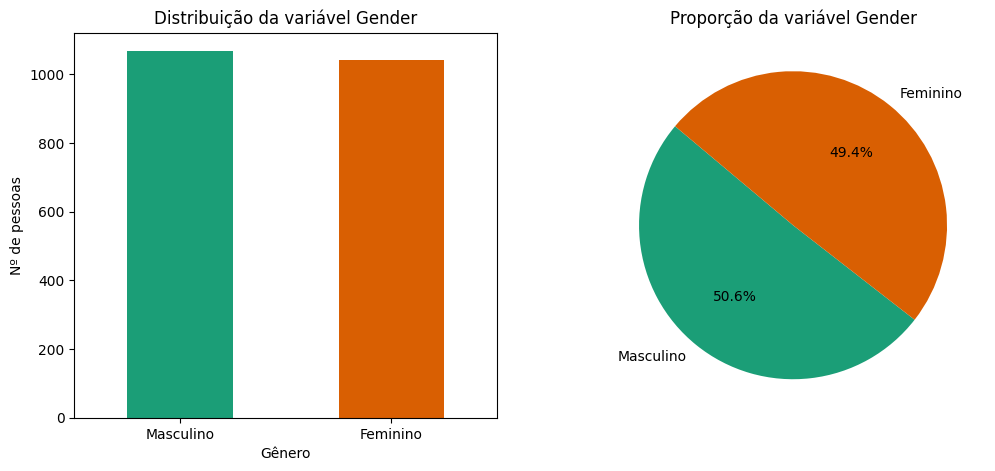

In [13]:
# @title Gênero
def genderCharts():
    counts = df['Gênero'].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

    counts.plot(kind='bar', color=sns.color_palette('Dark2'), ax=axes[0])
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].set_title('Distribuição da variável Gender')
    axes[0].set_ylabel('Nº de pessoas')
    axes[0].set_xlabel('Gênero')

    axes[1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('Dark2'),
        startangle=140
    )
    axes[1].set_title('Proporção da variável Gender')

    plt.show()
    return

genderCharts()

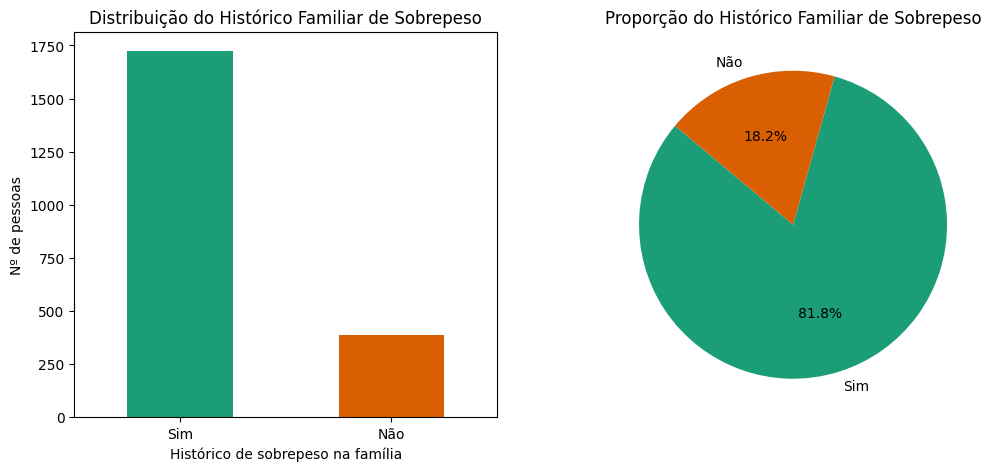

In [14]:
# @title Histórico de Obesidade na Família
def fhwoCharts():
    counts = df['Histórico Familiar de Sobrepeso'].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

    counts.plot(kind='bar', color=sns.color_palette('Dark2'), ax=axes[0])
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].set_title('Distribuição do Histórico Familiar de Sobrepeso')
    axes[0].set_ylabel('Nº de pessoas')
    axes[0].set_xlabel('Histórico de sobrepeso na família')

    axes[1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('Dark2'),
        startangle=140
    )
    axes[1].set_title('Proporção do Histórico Familiar de Sobrepeso')

    plt.show()
    return

fhwoCharts()

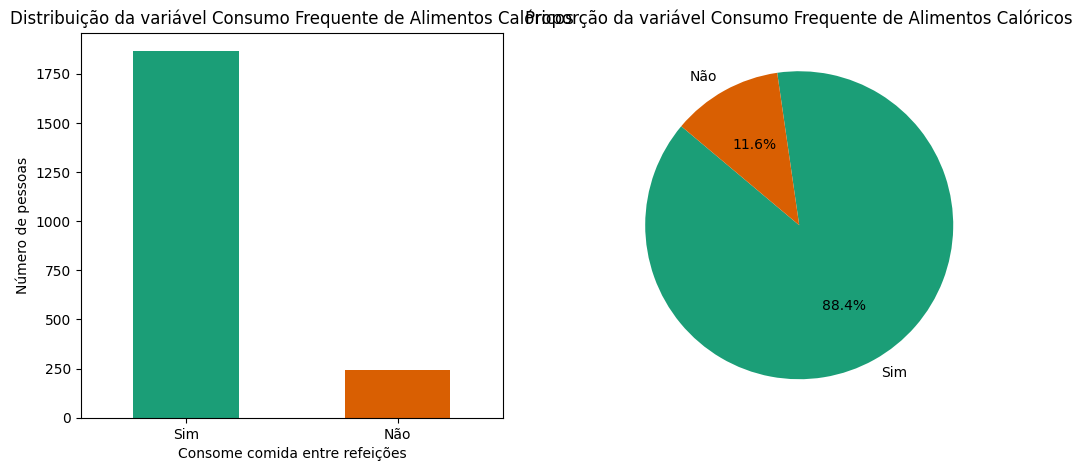

In [15]:
# @title Consumo de alimentos entre refeições
def favcCharts():
    var = 'Consumo Frequente de Alimentos Calóricos'

    counts = df[var].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

    counts.plot(kind='bar', color=sns.color_palette('Dark2'), ax=axes[0])
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].set_title('Distribuição da variável ' + var)
    axes[0].set_ylabel('Número de pessoas')
    axes[0].set_xlabel('Consome comida entre refeições')

    axes[1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('Dark2'),
        startangle=140
    )
    axes[1].set_title('Proporção da variável ' + var)

    plt.show()
    return
favcCharts()

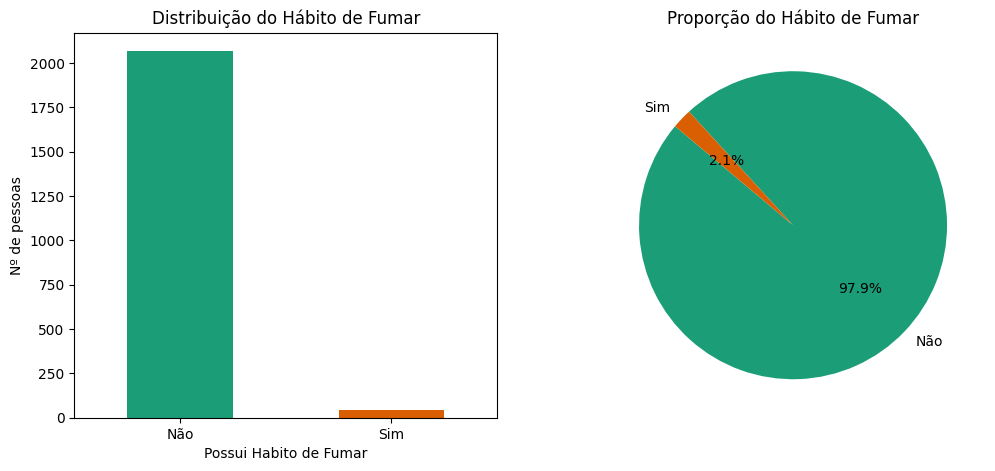

In [16]:
# @title Hábito de Fumar
def smokeCharts():
    var = 'Fumante'

    counts = df[var].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

    counts.plot(kind='bar', color=sns.color_palette('Dark2'), ax=axes[0])
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].set_title('Distribuição do Hábito de Fumar')
    axes[0].set_ylabel('Nº de pessoas')
    axes[0].set_xlabel('Possui Habito de Fumar')

    axes[1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('Dark2'),
        startangle=140
    )
    axes[1].set_title('Proporção do Hábito de Fumar')

    plt.show()
    return
smokeCharts()

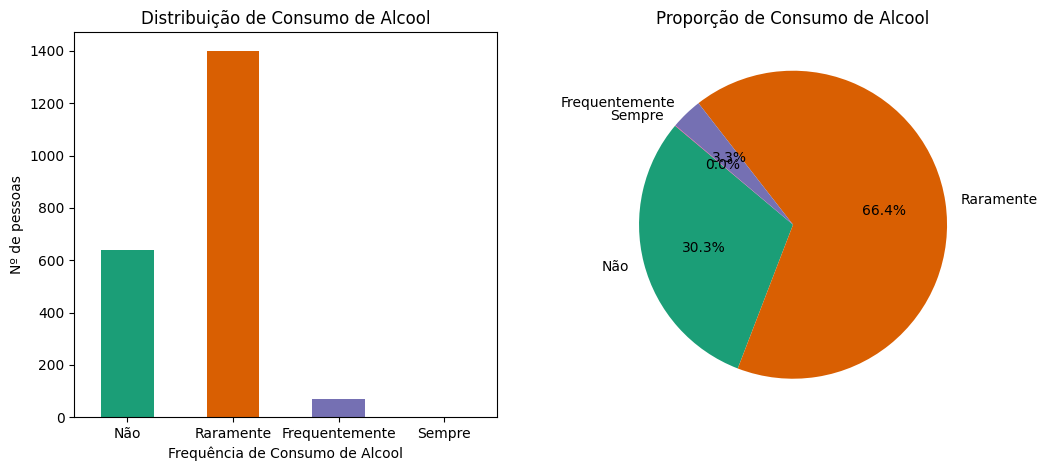

In [17]:
# @title Consumo de Alcool
def calcCharts():
    var = 'Consumo de Álcool'

    counts = df[var].value_counts()
    counts = pd.concat([counts.iloc[[1]], counts.iloc[[0, 2, 3]]])

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

    counts.plot(kind='bar', color=sns.color_palette('Dark2'), ax=axes[0])
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].set_title('Distribuição de Consumo de Alcool')
    axes[0].set_ylabel('Nº de pessoas')
    axes[0].set_xlabel('Frequência de Consumo de Alcool')

    axes[1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('Dark2'),
        startangle=140
    )
    axes[1].set_title('Proporção de Consumo de Alcool')

    plt.show()
    return
calcCharts()

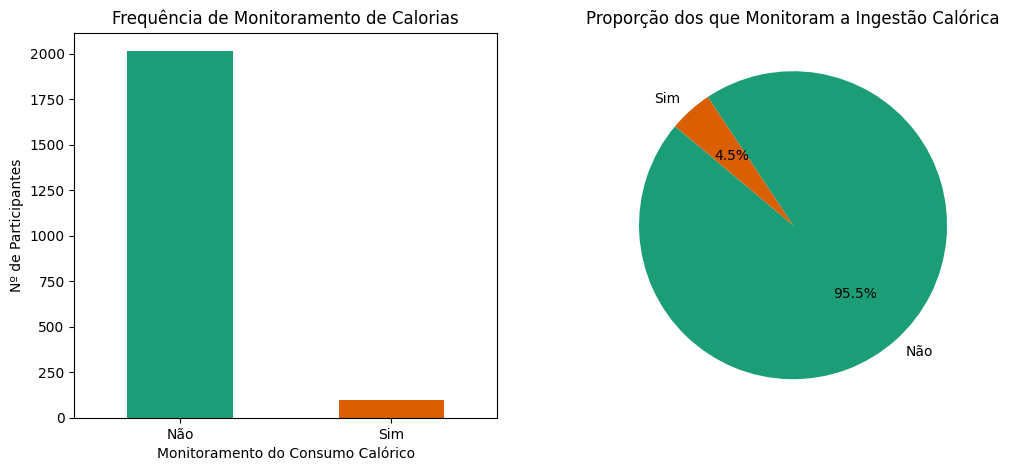

In [18]:
# @title Monitoramento de calorias
def sccCharts():
    var = 'Controle de Calorias'

    counts = df[var].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    counts.plot(kind='bar', color=sns.color_palette('Dark2'), ax=axes[0])
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].set_title('Frequência de Monitoramento de Calorias')
    axes[0].set_ylabel('Nº de Participantes')
    axes[0].set_xlabel('Monitoramento do Consumo Calórico')

    axes[1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('Dark2'),
        startangle=140
    )
    axes[1].set_title('Proporção dos que Monitoram a Ingestão Calórica')

    # plt.tight_layout()
    plt.show()
    return
sccCharts()


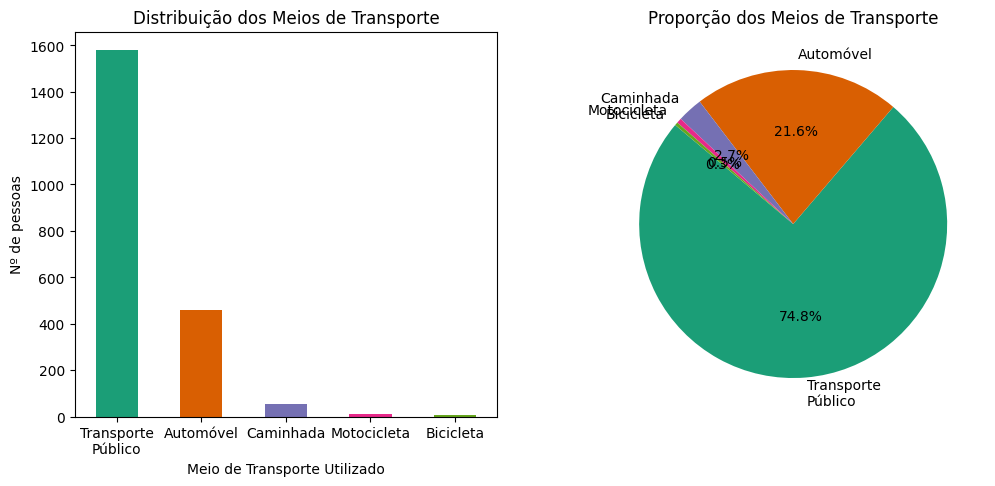

In [19]:
# @title Principal meio de transporte
def mtransCharts():
    var = 'Meio de Transporte Principal'

    # Substitui valores longos por versões com quebra de linha
    counts = df[var].value_counts()
    counts.index = [
        val.replace(' ', '\n') if val == 'Transporte Público' else val
        for val in counts.index
    ]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfico de barras
    counts.plot(kind='bar', color=sns.color_palette('Dark2'), ax=axes[0])
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].set_title('Distribuição dos Meios de Transporte')
    axes[0].set_ylabel('Nº de pessoas')
    axes[0].set_xlabel('Meio de Transporte Utilizado')

    # Gráfico de pizza
    axes[1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('Dark2'),
        startangle=140
    )
    axes[1].set_title('Proporção dos Meios de Transporte')

    plt.show()
    return

mtransCharts()

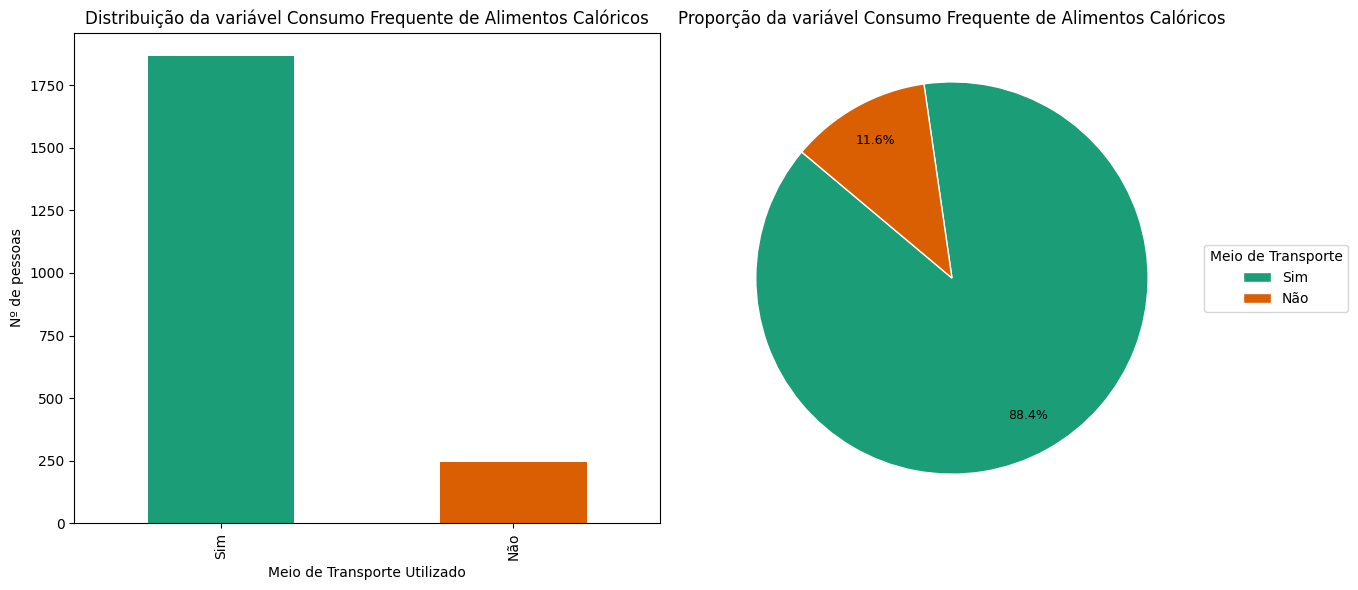

In [20]:
# @title Consumo Frequente de Alimentos Calóricos

var = 'Consumo Frequente de Alimentos Calóricos'

# Substitui valores longos por versões com quebra de linha
counts = df[var].value_counts()
counts.index = [
    val.replace(' ', '\n') if val == 'Transporte Público' else val
    for val in counts.index
]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras
counts.plot(kind='bar', color=sns.color_palette('Dark2'), ax=axes[0])
axes[0].set_title('Distribuição da variável ' + var)
axes[0].set_ylabel('Nº de pessoas')
axes[0].set_xlabel('Meio de Transporte Utilizado')

# --- Modificações para o gráfico de pizza ---

# Função para formatar autopct e posicionar fora para fatias pequenas
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # Defina um limite percentual abaixo do qual o rótulo vai para fora
        if pct > 5: # Por exemplo, se a fatia for maior que 5%
            return '{p:.1f}%'.format(p=pct)
        else:
            return '' # Não mostra o percentual dentro da fatia
    return my_autopct

wedges, texts, autotexts = axes[1].pie(
    counts,
    autopct=autopct_format(counts), # Usa a função personalizada
    colors=sns.color_palette('Dark2'),
    startangle=140,
    pctdistance=0.8,    # percentual dentro da fatia (ainda usado para a função)
    textprops={'fontsize': 9},
    wedgeprops={'edgecolor': 'w'}
)

# Adiciona a legenda
axes[1].legend(wedges, counts.index,
              title="Meio de Transporte",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))


# Adiciona os percentuais fora para as fatias pequenas
# Percorre os objetos de texto criados pelo pie
for i, text in enumerate(autotexts):
    # Se a porcentagem não foi mostrada (retorno vazio da função autopct_format)
    if text.get_text() == '':
        # Obtém a posição do centro da fatia
        angle = (wedges[i].theta2 + wedges[i].theta1) / 2.
        x = wedges[i].center[0] + (wedges[i].r/0.8) * np.cos(np.deg2rad(angle)) # Ajuste a posição horizontal
        y = wedges[i].center[1] + (wedges[i].r/0.8) * np.sin(np.deg2rad(angle)) # Ajuste a posição vertical

        # Adiciona o texto da porcentagem fora
        axes[1].text(x, y, '{:.1f}%'.format(counts.iloc[i] / sum(counts) * 100),
                horizontalalignment=text.get_horizontalalignment(),
                bbox={'facecolor':'white', 'alpha':0.8, 'pad':2})

# --- Fim das modificações ---


axes[1].set_title('Proporção da variável ' + var)

plt.tight_layout()
plt.show()

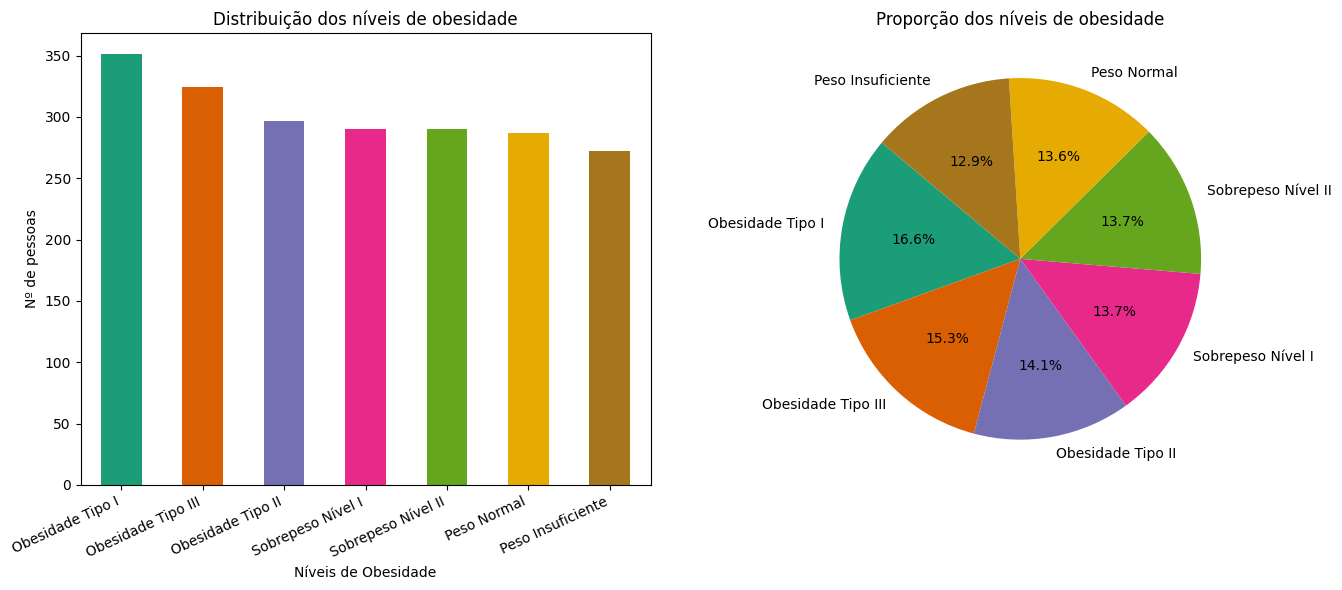

In [21]:
# @title Níveis de Obesidade

def obesityCharts():
    var = 'Nível de Obesidade'

    counts = df[var].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    counts.plot(kind='bar', color=sns.color_palette('Dark2'), ax=axes[0])
    axes[0].tick_params(axis='x', rotation=25)
    for label in axes[0].get_xticklabels():
        label.set_ha('right')
    axes[0].set_title('Distribuição dos níveis de obesidade')
    axes[0].set_ylabel('Nº de pessoas')
    axes[0].set_xlabel('Níveis de Obesidade')

    axes[1].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('Dark2'),
        startangle=140
    )
    # axes[1].legend(wedges, counts.index,
    #             title="Nível de Obesidade",
    #             loc="center left",
    #             bbox_to_anchor=(1, 0, 0.5, 1))
    axes[1].set_title('Proporção dos níveis de obesidade')

    plt.tight_layout()
    plt.show()
    return

obesityCharts()

## Análise Variáveis Categoricas

### Stacked Plot

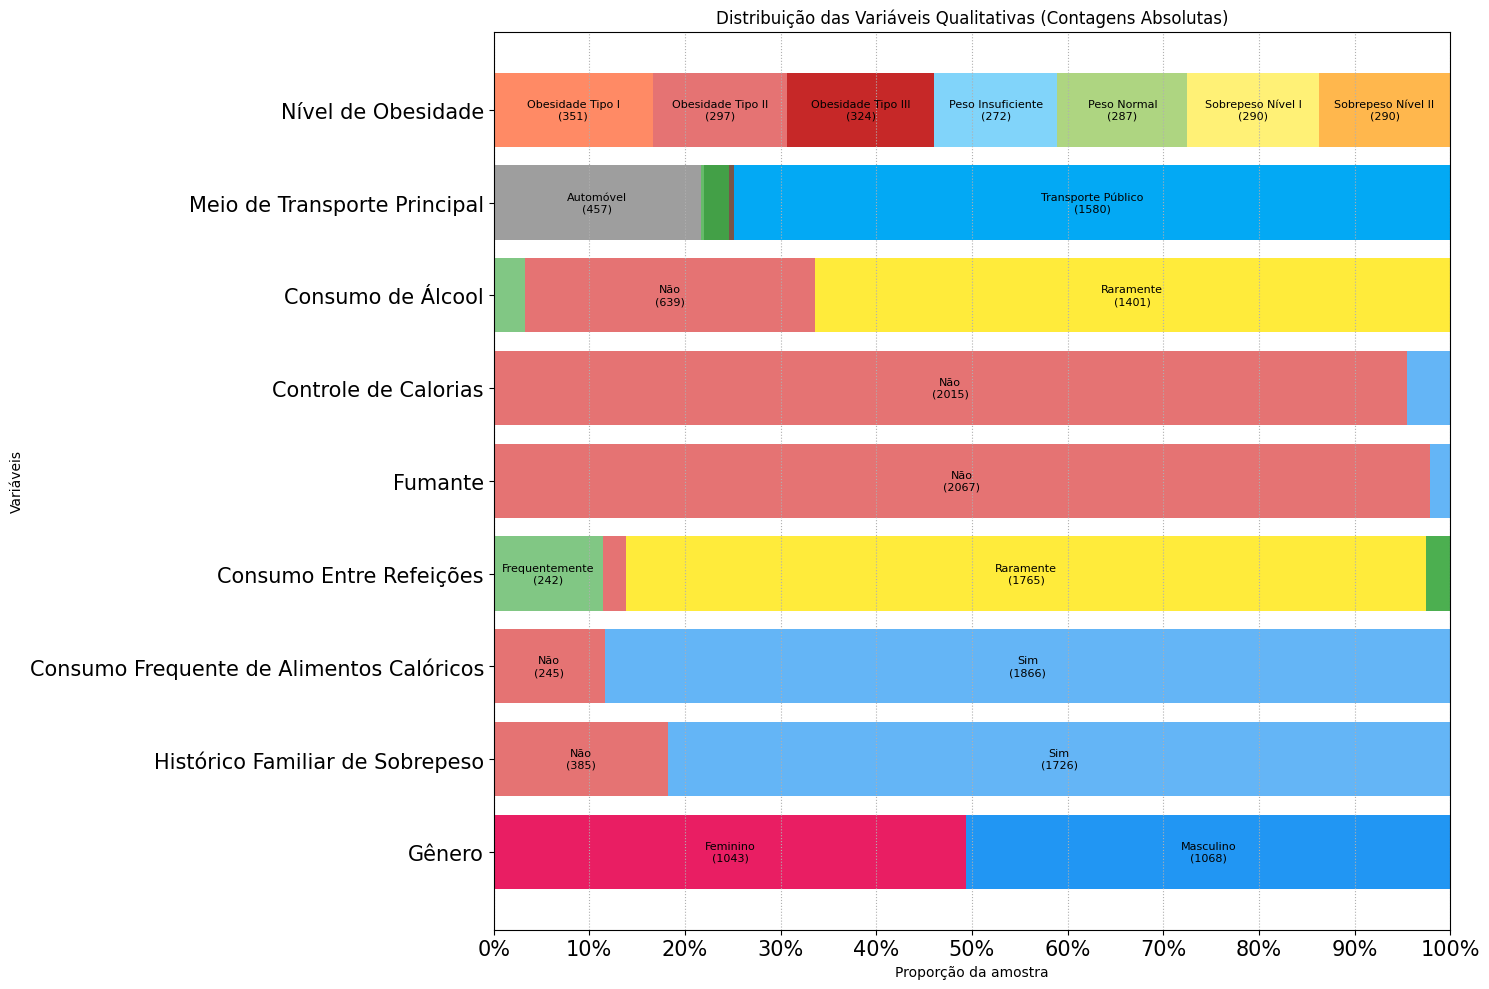

In [ ]:
def stacked_plot():
    # Contagem absoluta das variáveis qualitativas
    counts = qualiVars.apply(pd.Series.value_counts).T.fillna(0)

    # Paleta de cores personalizada
    palette = {
        'Sempre': '#4CAF50', 'Frequentemente': '#81C784', 'Raramente': '#FFEB3B',
        'Não': '#E57373', 'Sim': '#64B5F6',
        'Automóvel': '#9E9E9E', 'Motocicleta': '#795548', 'Bicicleta': '#66BB6A',
        'Caminhada': '#43A047', 'Transporte Público': '#03A9F4',
        'Masculino': '#2196F3', 'Feminino': '#E91E63',
        'Peso Insuficiente': '#81D4FA', 'Peso Normal': '#AED581',
        'Sobrepeso Nível I': '#FFF176', 'Sobrepeso Nível II': '#FFB74D',
        'Obesidade Tipo I': '#FF8A65', 'Obesidade Tipo II': '#E57373', 'Obesidade Tipo III': '#C62828',
    }

    fig, ax = plt.subplots(figsize=(15, 10))
    base = pd.Series(0, index=counts.index)
    grouped_legend = OrderedDict()

    for category in counts.columns:
        values = counts[category]
        color = palette.get(category, '#cccccc')

        bars = ax.barh(counts.index, values, left=base, color=color)
        base += values

        # Rótulos visíveis dentro das barras
        ax.bar_label(
            bars,
            labels=[f'{category}\n({int(v)})' if v > 100 else '' for v in values],
            label_type='center',
            fontsize=8,
            color='black'
        )

        # Agrupar entradas pequenas para legenda personalizada
        for idx, v in values.items():
            if 0 < v < 100:
                entry = f'{category} ({int(v)})'
                grouped_legend.setdefault(idx, []).append((entry, color))

    # Criar legendas agrupadas com cores separadas por categoria
    handles = []
    for variable, entries in grouped_legend.items():
        handles.append(mpatches.Patch(color='white', label=f'# {variable}'))
        handles.extend(
            mpatches.Patch(color=color, label=f'   {label}') for label, color in entries
        )

    # Eixo X como porcentagem da amostra
    total = len(qualiVars)
    xticks = np.linspace(0, total, 11)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f'{x/total:.0%}' for x in xticks], fontsize=15)
    ax.tick_params(axis='y', labelsize=15)

    # Estética e títulos
    ax.set_title('Distribuição das Variáveis Qualitativas (Contagens Absolutas)')
    ax.set_xlabel('Proporção da amostra')
    ax.set_ylabel('Variáveis')
    ax.grid(axis='x', linestyle=':')

    # ax.legend(
    #     handles=handles,
    #     title='Categorias (valores pequenos)',
    #     bbox_to_anchor=(1.05, 1),
    #     loc='upper left',
    #     fontsize=15
    # )

    plt.tight_layout()
    plt.show()
stacked_plot()

### Heatmap Categóricas

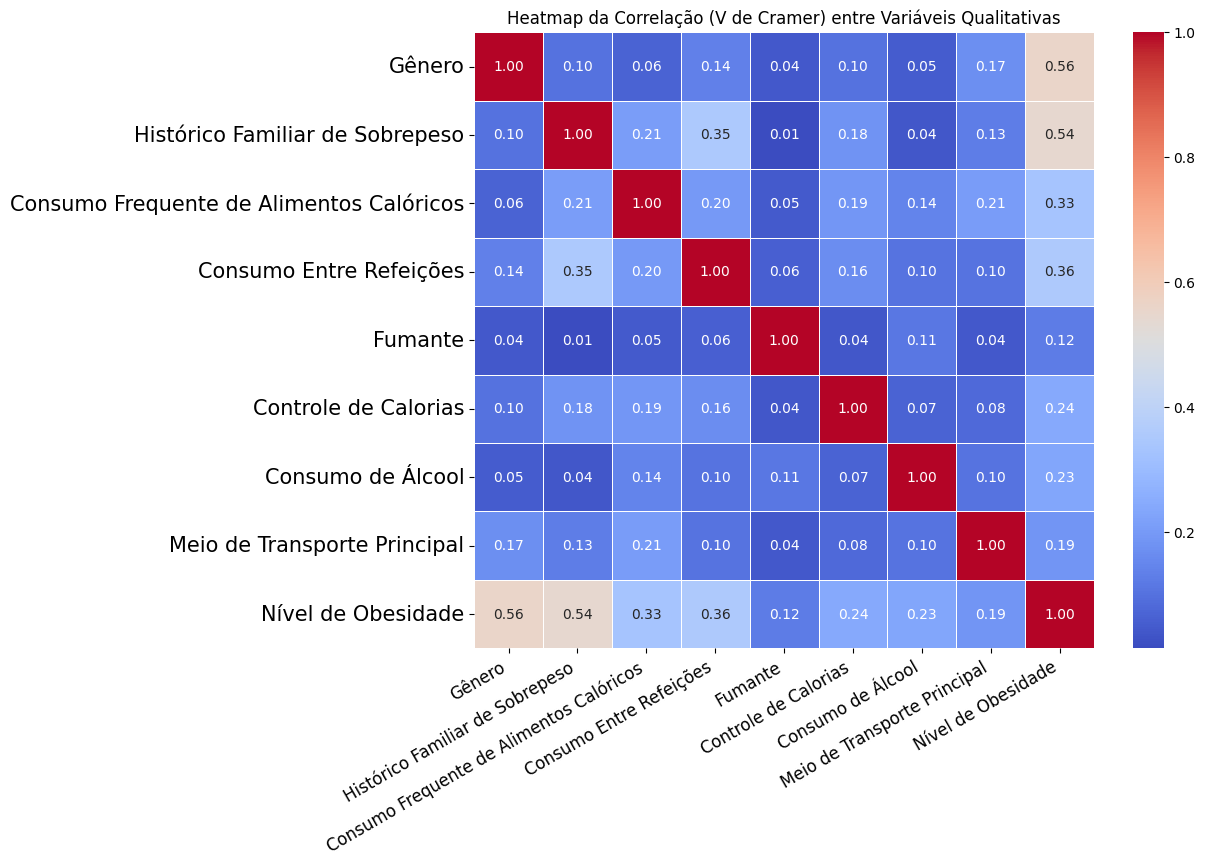

In [ ]:
import pandas as pd
import scipy.stats as stats
import numpy as np

qualiVars_encoded = qualiVars.apply(lambda x: x.astype('category').cat.codes)

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    i = min(confusion_matrix.shape)
    j = max(confusion_matrix.shape)
    if i == 1 and j == 1: return 1.0
    if chi2 == 0: return 0.0
    return np.sqrt(chi2 / (n * (i - 1)))

n_quali_vars = qualiVars_encoded.shape[1]
cramer_matrix = pd.DataFrame(np.ones((n_quali_vars, n_quali_vars)),
                             index=qualiVars_encoded.columns,
                             columns=qualiVars_encoded.columns)

for col1 in qualiVars_encoded.columns:
    for col2 in qualiVars_encoded.columns:
        if col1 != col2:
            v_cramer = cramers_v(qualiVars_encoded[col1], qualiVars_encoded[col2])
            cramer_matrix.loc[col1, col2] = v_cramer
            cramer_matrix.loc[col2, col1] = v_cramer

plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap da Correlação (V de Cramer) entre Variáveis Qualitativas')
plt.yticks(fontsize=15)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.show()

### Mosaic categoricas

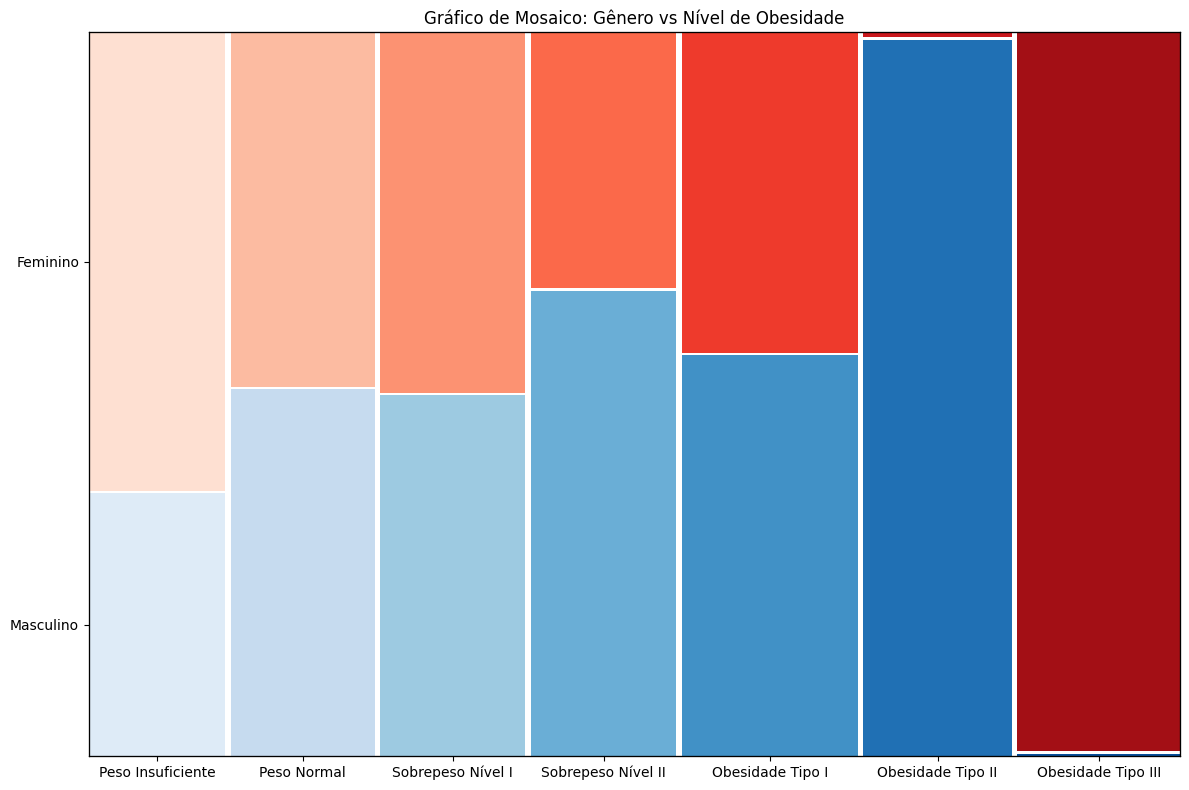

Bad pipe message: %s [b'"Brave";v="137", "Chromium";v="137", "Not/A)Brand";v="24"']
Bad pipe message: %s [b'sec-ch-ua-mo']
Bad pipe message: %s [b'le: ?0\r\nsec-ch-ua-platform: "Windows"\r\nDNT: 1\r\nUpgrade-Insecure-Requests: 1\r\nUser-Agent: Mozilla/', b'0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (']
Bad pipe message: %s [b'TML, like Gecko) Chrome/137.0.0.0 Safari/537.36\r\nAccept: text/html,applica']
Bad pipe message: %s [b'ol: max-age=0\r\nsec-ch-ua: "Brave";v="137", "Chromium";v="137", "Not/A)Brand";v="24"\r\nsec-ch-ua-mobile: ?0\r\nsec-ch-u']
Bad pipe message: %s [b'platform: "Windows"\r\nDNT: 1\r\nUpgrade-Insecure-Requests: 1\r\nUser-Agent: Mozilla/5.0 (Windows NT 1', b'0; Win64; x64) AppleWebKit/537.36 (KHTML, like ']
Bad pipe message: %s [b'cko) Chrome/137.0.0.0 Safari/537.36\r\nAccept: text/html,application/xht', b'+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8\r\nSec-GPC: 1\r\nAccept-Language: en-US,en']


In [29]:
# @title Mosaico Original
def plot_mosaico_genero():
    custom_palettes = {
        'Masculino': sns.color_palette('Blues', 7),
        'Feminino': sns.color_palette('Reds', 7),
    }

    obesity_categories = [
        'Peso Insuficiente',
        'Peso Normal',
        'Sobrepeso Nível I',
        'Sobrepeso Nível II',
        'Obesidade Tipo I',
        'Obesidade Tipo II',
        'Obesidade Tipo III'
    ]
    contagem = {}
    props = {}
    for q_cat in custom_palettes:
        for index, o_cat in enumerate(obesity_categories):
            # print(obesity_categories[index], o_cat)
            contagem[(o_cat, q_cat)] = ((df['Gênero'] == q_cat) & (df['Nível de Obesidade'] == o_cat)).sum()
            color = custom_palettes[q_cat][index]
            props[(o_cat, q_cat)] = {'facecolor': color}


    col = "Gênero"
    fig, ax = plt.subplots(figsize=(12, 8))

    # Obter as propriedades de cor e a lista de categorias de obesidade
    # props, obesity_categories = set_props()


    mosaic(contagem,
           title=f'Gráfico de Mosaico: {col} vs Nível de Obesidade',
           ax=ax,
           properties=props,
           labelizer=lambda k: ''
    )


    # Rotacionar os rótulos do eixo X
    # for tick in ax.get_xticklabels():
    #     tick.set_size(11)
    #     tick.set_rotation(30)

    plt.tight_layout() # Ajustar o layout para acomodar os rótulos
    plt.show()
    return

# for key, value in set_props():
#     print(key, value)
plot_mosaico_genero()

### Distribuição da Função Densidade do Índice de Massa Corporal por Gênero

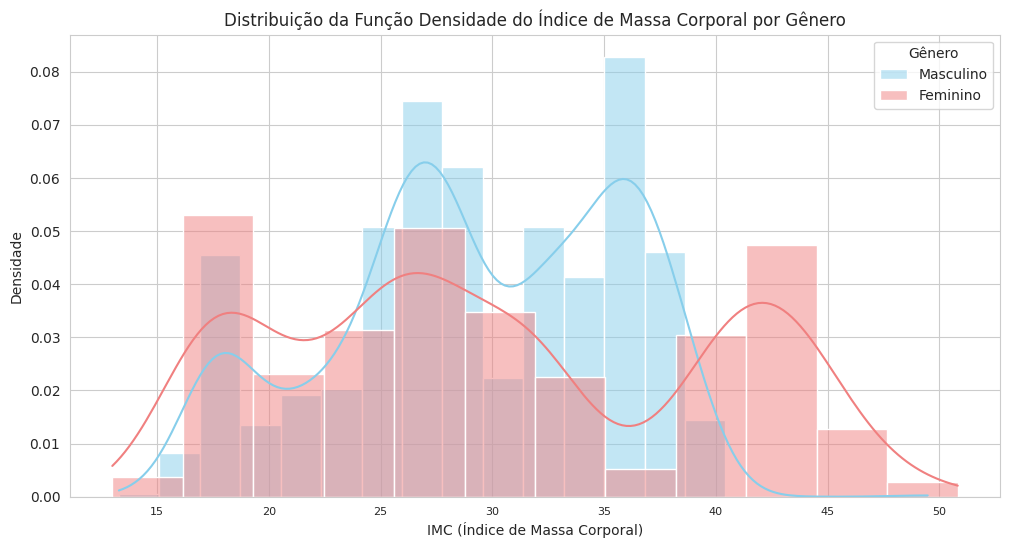

In [ ]:
df['IMC'] = df['Peso (kg)'] / (df['Altura (m)']**2)

df_male = df[df['Gênero'] == 'Masculino']
df_female = df[df['Gênero'] == 'Feminino']

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

sns.histplot(data=df_male, x='IMC', kde=True, color='skyblue', label='Masculino', stat='density', common_norm=False)

sns.histplot(data=df_female, x='IMC', kde=True, color='lightcoral', label='Feminino', stat='density', common_norm=False)

plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)
plt.title('Distribuição da Função Densidade do Índice de Massa Corporal por Gênero')
plt.xlabel('IMC (Índice de Massa Corporal)')
plt.ylabel('Densidade')
plt.legend(title='Gênero')
plt.show()


### Mosaico HFS

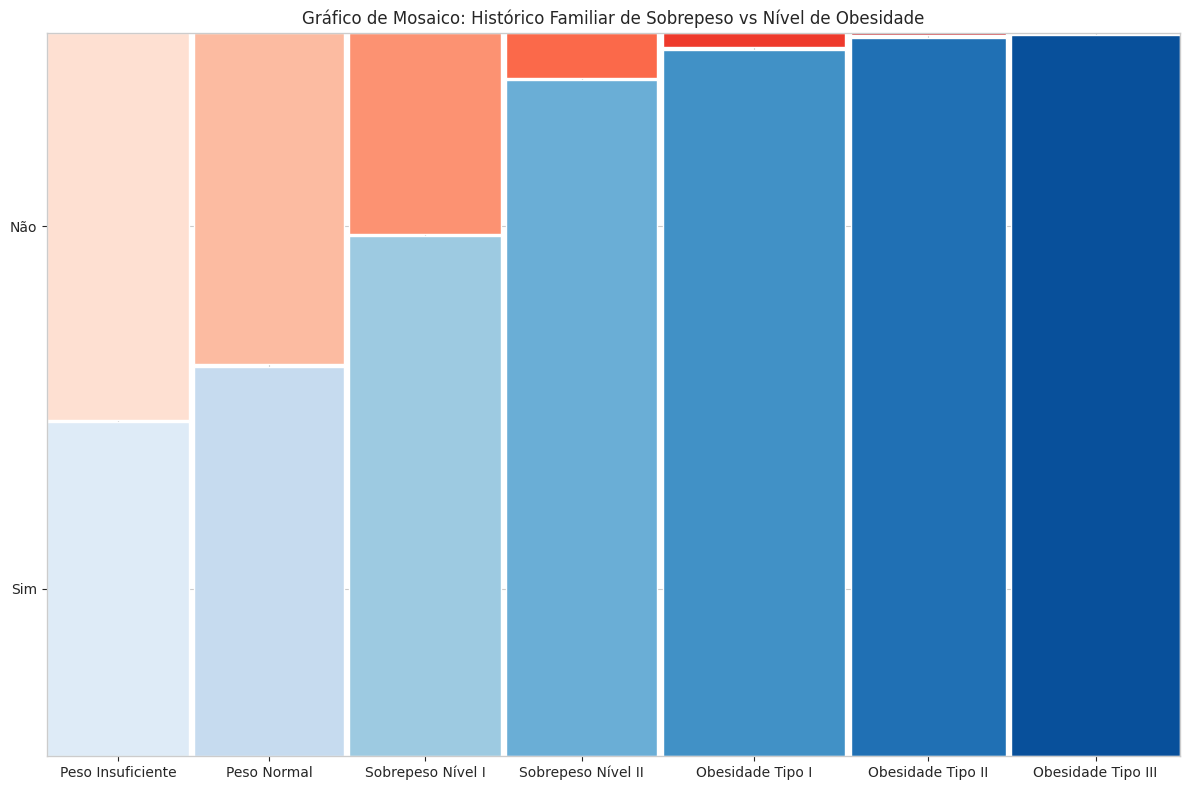

In [ ]:
# @title 
def plot_mosaico_genero():
    custom_palettes = {
        'Sim': sns.color_palette('Blues', 7),
        'Não': sns.color_palette('Reds', 7),
    }

    obesity_categories = [
        'Peso Insuficiente',
        'Peso Normal',
        'Sobrepeso Nível I',
        'Sobrepeso Nível II',
        'Obesidade Tipo I',
        'Obesidade Tipo II',
        'Obesidade Tipo III'
    ]
    contagem = {}
    props = {}
    for q_cat in custom_palettes:
        for index, o_cat in enumerate(obesity_categories):
            # print(obesity_categories[index], o_cat)
            contagem[(o_cat, q_cat)] = ((df['Histórico Familiar de Sobrepeso'] == q_cat) & (df['Nível de Obesidade'] == o_cat)).sum()
            color = custom_palettes[q_cat][index]
            props[(o_cat, q_cat)] = {'facecolor': color}


    col = "Histórico Familiar de Sobrepeso"
    fig, ax = plt.subplots(figsize=(12, 8))

    mosaic(contagem,
           title=f'Gráfico de Mosaico: {col} vs Nível de Obesidade',
           ax=ax,
           properties=props,
           labelizer=lambda k: ''
    )


    # Rotacionar os rótulos do eixo X
    # for tick in ax.get_xticklabels():
    #     tick.set_size(11)
    #     tick.set_rotation(30)

    plt.tight_layout() # Ajustar o layout para acomodar os rótulos
    plt.show()
    return

# for key, value in set_props():
#     print(key, value)
plot_mosaico_genero()

### Mosaico Consumo Frequente de Alimentos Calóricos

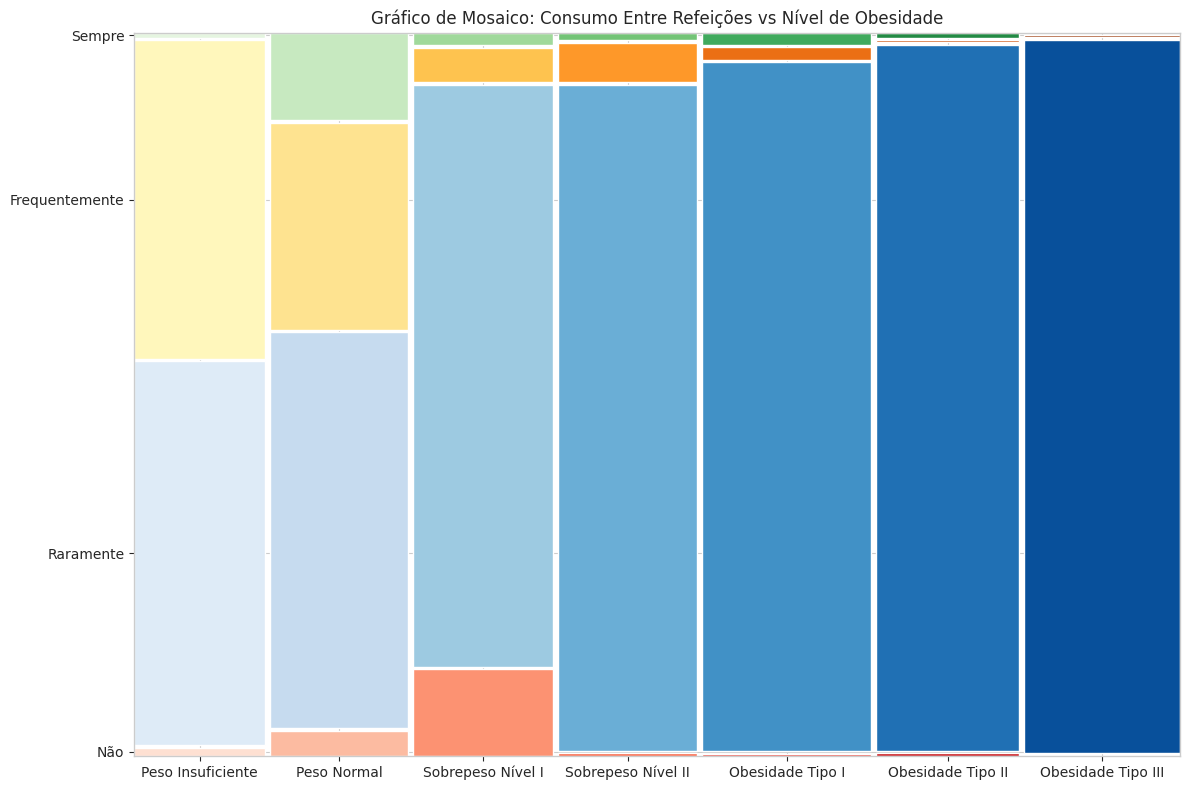

In [ ]:
# @title Mosaico Consumo Frequente de Alimentos Calóricos
def plot_mosaico_genero():
    custom_palettes = {
        # 'Sim': sns.color_palette('Blues', 7),
        'Não': sns.color_palette('Reds', 7),
        "Raramente" : sns.color_palette('Blues', 7),
        "Frequentemente" : sns.color_palette('YlOrBr', 7),
        "Sempre" : sns.color_palette('Greens', 7),
    }

    obesity_categories = [
        'Peso Insuficiente',
        'Peso Normal',
        'Sobrepeso Nível I',
        'Sobrepeso Nível II',
        'Obesidade Tipo I',
        'Obesidade Tipo II',
        'Obesidade Tipo III'
    ]
    contagem = {}
    props = {}
    for q_cat in custom_palettes:
        for index, o_cat in enumerate(obesity_categories):
            # print(obesity_categories[index], o_cat)
            contagem[(o_cat, q_cat)] = ((df['Consumo Entre Refeições'] == q_cat) & (df['Nível de Obesidade'] == o_cat)).sum()
            color = custom_palettes[q_cat][index]
            props[(o_cat, q_cat)] = {'facecolor': color}


    col = "Consumo Entre Refeições"
    fig, ax = plt.subplots(figsize=(12, 8))

    mosaic(contagem,
           title=f'Gráfico de Mosaico: {col} vs Nível de Obesidade',
           ax=ax,
           properties=props,
           labelizer=lambda k: ''
    )


    # Rotacionar os rótulos do eixo X
    # for tick in ax.get_xticklabels():
    #     tick.set_size(11)
    #     tick.set_rotation(30)

    plt.tight_layout() # Ajustar o layout para acomodar os rótulos
    plt.show()
    return

# for key, value in set_props():
#     print(key, value)
plot_mosaico_genero()

### Distribuição de Massa Corporal por Gênero (Histograma + KDE)

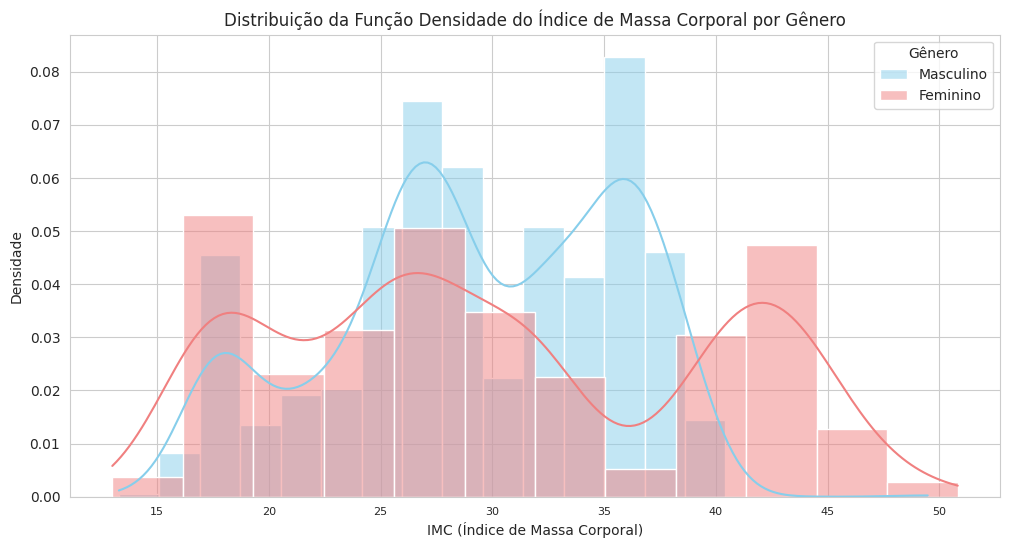

In [30]:
# Calcula o IMC (Índice de Massa Corporal)
df['IMC'] = df['Peso (kg)'] / (df['Altura (m)']**2)

# Filtra os dados por gênero
df_male = df[df['Gênero'] == 'Masculino']
df_female = df[df['Gênero'] == 'Feminino']

# Configura o estilo do seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Histograma combinado com KDE para IMC Masculino
sns.histplot(data=df_male, x='IMC', kde=True, color='skyblue', label='Masculino', stat='density', common_norm=False)

# Histograma combinado com KDE para IMC Feminino
sns.histplot(data=df_female, x='IMC', kde=True, color='lightcoral', label='Feminino', stat='density', common_norm=False)

plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=10)
plt.title('Distribuição da Função Densidade do Índice de Massa Corporal por Gênero')
plt.xlabel('IMC (Índice de Massa Corporal)')
plt.ylabel('Densidade')
plt.legend(title='Gênero')
plt.show()


## Variáveis Quantitativas

In [ ]:
quantiVars = df.select_dtypes(include=['int64', 'float64'])
quantiVars.head()

,Idade,Altura (m),Peso (kg),Frequência de Consumo de Verduras,Número de Refeições Principais por Dia,Consumo Diário de Água,Frequência de Atividade Física,Tempo em Tecnologias
0,21,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22,1.78,89.8,2.0,1.0,2.0,0.0,0.0


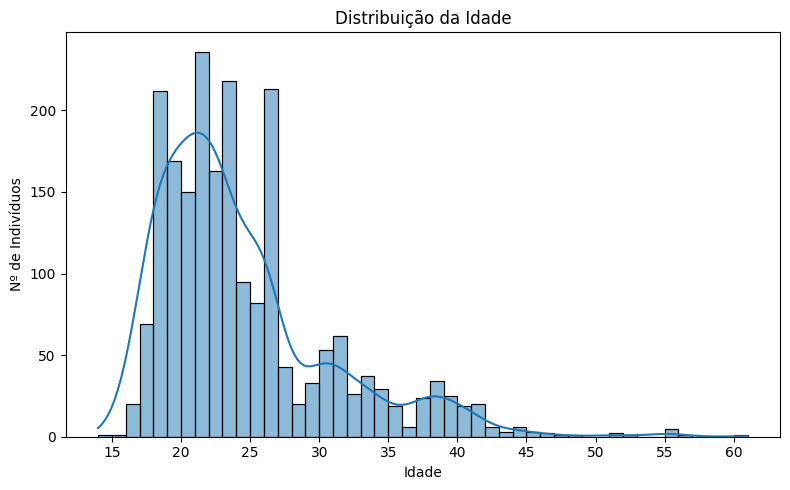

In [ ]:
# @title Idade
def heightCharts():
    col = 'Idade'
    n_bins = 25
    # Use o valor máximo real da coluna para o limite superior dos bins
    max_val = df[col].max()
    min_val = df[col].min()

    # Calcule as bordas dos bins usando linspace com o valor máximo real
    # Ajuste o step para garantir que as bordas sejam inteiras para idades
    bin_edges = np.arange(min_val, max_val + 1, 1)


    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=bin_edges)

    plt.title('Distribuição da Idade')
    plt.xlabel('Idade')
    plt.ylabel('Nº de Indivíduos')
    # Remova esta linha para permitir que seaborn gerencie os ticks do eixo x
    # plt.xticks(bin_edges)

    # Define os ticks do eixo x a cada 5 anos
    plt.xticks(np.arange(min_val+1, max_val + 1, 5))


    plt.tight_layout()
    plt.show()
    return

heightCharts()

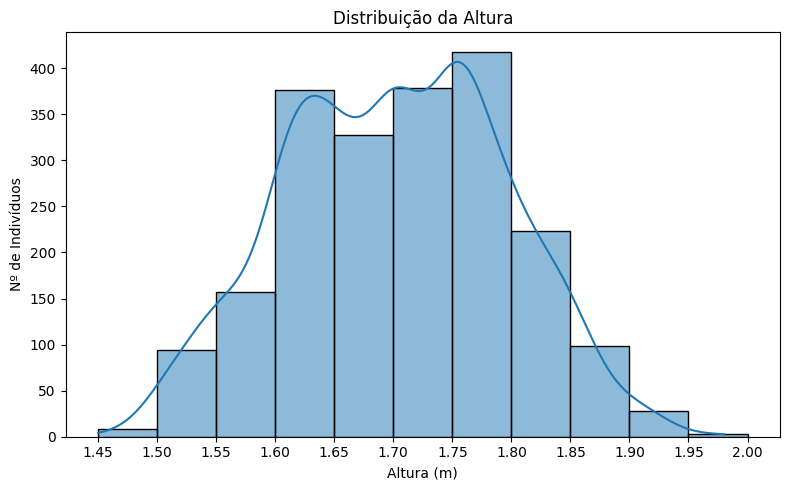

In [ ]:
# @title Altura
def heightCharts():
    col = 'Altura (m)'
    n_bins = 12
    max_lim = 2

    min_val = df[col].min()
    bin_edges = np.linspace(min_val, max_lim, n_bins)

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=bin_edges)

    plt.title('Distribuição da Altura')
    plt.xlabel('Altura (m)')
    plt.ylabel('Nº de Indivíduos')
    plt.xticks(bin_edges)

    plt.tight_layout()
    plt.show()
    return

heightCharts()

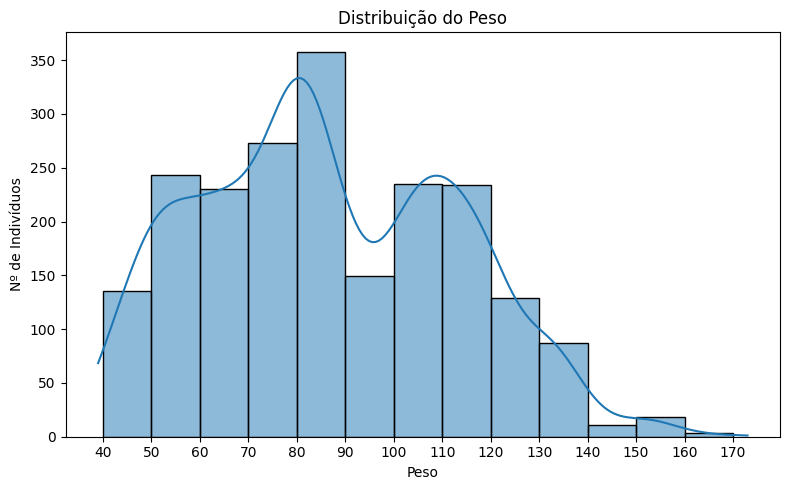

In [ ]:
# @title Peso
def heightCharts():
    col = 'Peso (kg)'
    n_bins = 25
    # Use o valor máximo real da coluna para o limite superior dos bins
    max = df[col].max()
    min = df[col].min()

    # Calcule as bordas dos bins usando linspace com o valor máximo real
    # Ajuste o step para garantir que as bordas sejam inteiras para idades
    bin_edges = np.arange(min+1, max + 1, int((max - min)/13))


    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=bin_edges)

    plt.title('Distribuição do Peso')
    plt.xlabel('Peso')
    plt.ylabel('Nº de Indivíduos')
    # Remova esta linha para permitir que seaborn gerencie os ticks do eixo x
    # plt.xticks(bin_edges)

    # Define os ticks do eixo x a cada 5 anos
    plt.xticks(np.arange(min+1, max, 10))


    plt.tight_layout()
    plt.show()
    return

heightCharts()

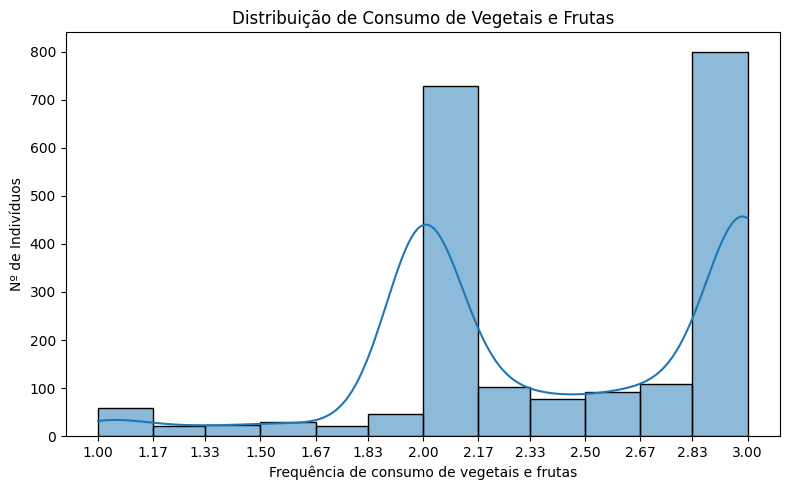

In [ ]:
# @title FCVC Frequência de Consumo de Vegetais
def fcvcCharts():
    col = 'Frequência de Consumo de Verduras'
    n_bins = 12

    max_lim = df[col].max()
    min_val = df[col].min()
    bin_edges = np.linspace(min_val, max_lim, n_bins +1)
    bin_edges = np.round(bin_edges, 2)

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=bin_edges)

    plt.title('Distribuição de Consumo de Vegetais e Frutas')
    plt.xlabel('Frequência de consumo de vegetais e frutas')
    plt.ylabel('Nº de Indivíduos')
    plt.xticks(bin_edges)

    plt.tight_layout()
    plt.show()
    return

fcvcCharts()

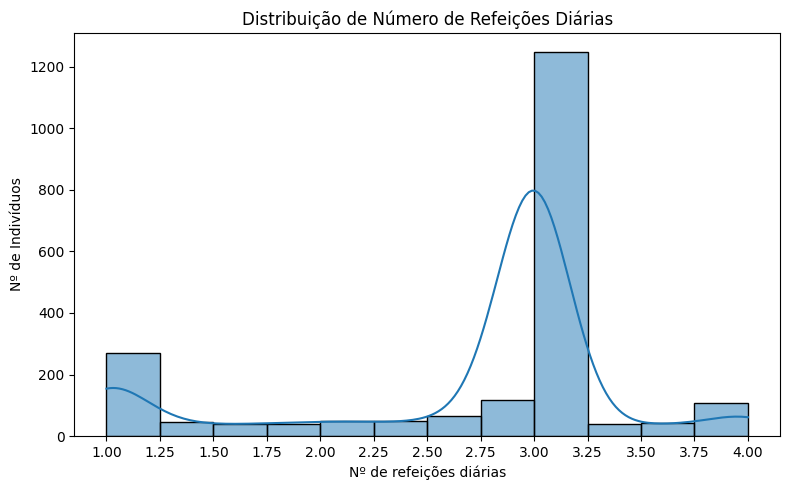

In [ ]:
# @title NCP - Número de Refeições Diarias
def ncpCharts():
    col = 'Número de Refeições Principais por Dia'
    n_bins = 12

    max_lim = df[col].max()
    min_val = df[col].min()
    bin_edges = np.linspace(min_val, max_lim, n_bins +1)
    bin_edges = np.round(bin_edges, 2)

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=bin_edges)

    plt.title('Distribuição de Número de Refeições Diárias')
    plt.xlabel('Nº de refeições diárias')
    plt.ylabel('Nº de Indivíduos')
    plt.xticks(bin_edges)

    plt.tight_layout()
    plt.show()
    return

ncpCharts()

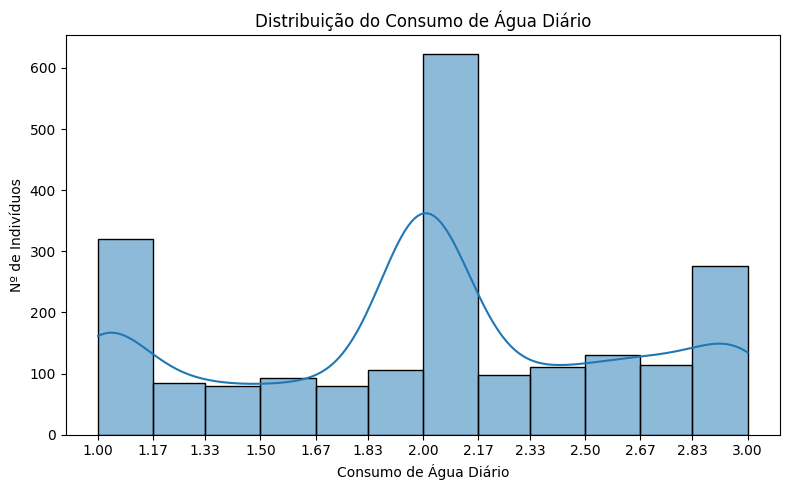

In [ ]:
#@title	CH2O - Consumo de Água Diário

def ch2oCharts():
    col = 'Consumo Diário de Água'
    n_bins = 12

    max_lim = df[col].max()
    min_val = df[col].min()
    bin_edges = np.linspace(min_val, max_lim, n_bins +1)
    bin_edges = np.round(bin_edges, 2)

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=bin_edges)

    plt.title('Distribuição do Consumo de Água Diário')
    plt.xlabel('Consumo de Água Diário')
    plt.ylabel('Nº de Indivíduos')
    plt.xticks(bin_edges)

    plt.tight_layout()
    plt.show()
    return

ch2oCharts()

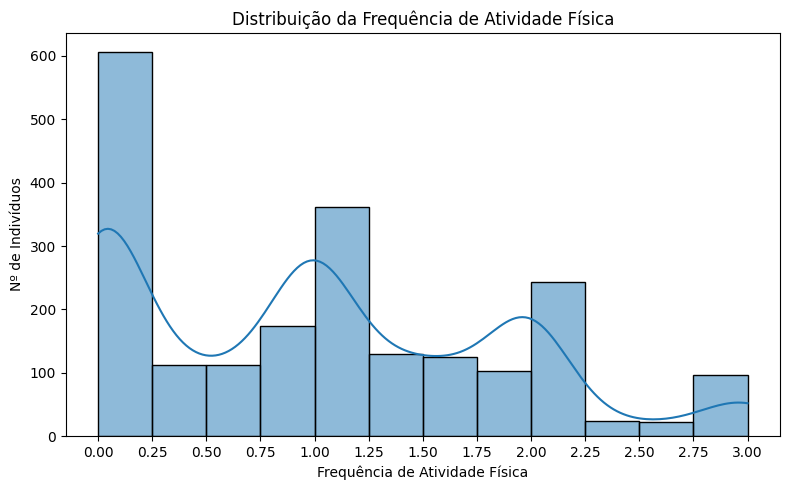

In [ ]:
# @title	FAF - Habitos de Atividade Física


def fafCharts():
    col = 'Frequência de Atividade Física'
    n_bins = 12

    max_lim = df[col].max()
    min_val = df[col].min()
    bin_edges = np.linspace(min_val, max_lim, n_bins +1)
    bin_edges = np.round(bin_edges, 2)

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=bin_edges)

    plt.title('Distribuição da Frequência de Atividade Física')
    plt.xlabel('Frequência de Atividade Física')
    plt.ylabel('Nº de Indivíduos')
    plt.xticks(bin_edges)

    plt.tight_layout()
    plt.show()
    return

fafCharts()

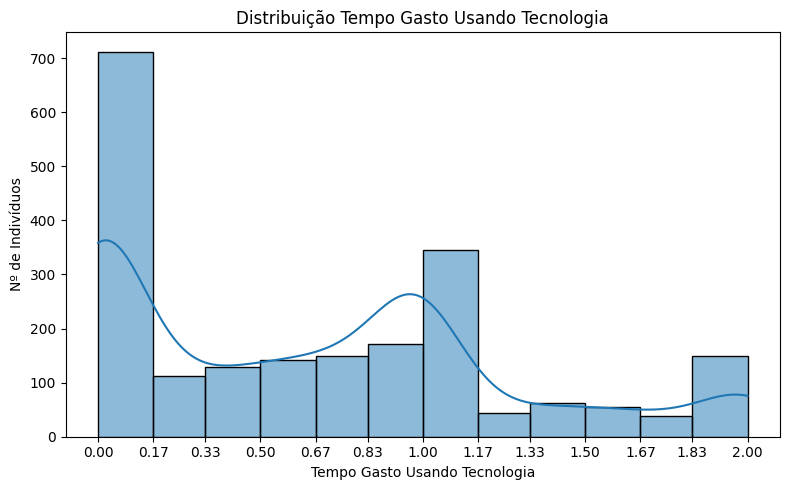

In [ ]:
# @title  	TUE - Tempo Gasto Usando Tecnologia

def tueCharts():
    col = 'Tempo em Tecnologias'
    n_bins = 12

    max_lim = df[col].max()
    min_val = df[col].min()
    bin_edges = np.linspace(min_val, max_lim, n_bins +1)
    bin_edges = np.round(bin_edges, 2)

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, kde=True, bins=bin_edges)

    plt.title('Distribuição Tempo Gasto Usando Tecnologia')
    plt.xlabel('Tempo Gasto Usando Tecnologia')
    plt.ylabel('Nº de Indivíduos')
    plt.xticks(bin_edges)

    plt.tight_layout()
    plt.show()
    return

tueCharts()

# 4. Correlação entre Variáveis Contínuas

Podemos aplicar nessa situação um calculo estatitico que obtem um indice de relação entre as duas medidas

### Correlação de variáveis numéricas

In [ ]:
# @title Transformação Ordinal de Obesidade
obesity_mapping = {
    'Peso Insuficiente': 0,
    'Peso Normal': 1,
    'Sobrepeso Nível I': 2,
    'Sobrepeso Nível II': 3,
    'Obesidade Tipo I': 4,
    'Obesidade Tipo II': 5,
    'Obesidade Tipo III': 6
}
df['Obesity_Numeric'] = df['Nível de Obesidade'].map(obesity_mapping)

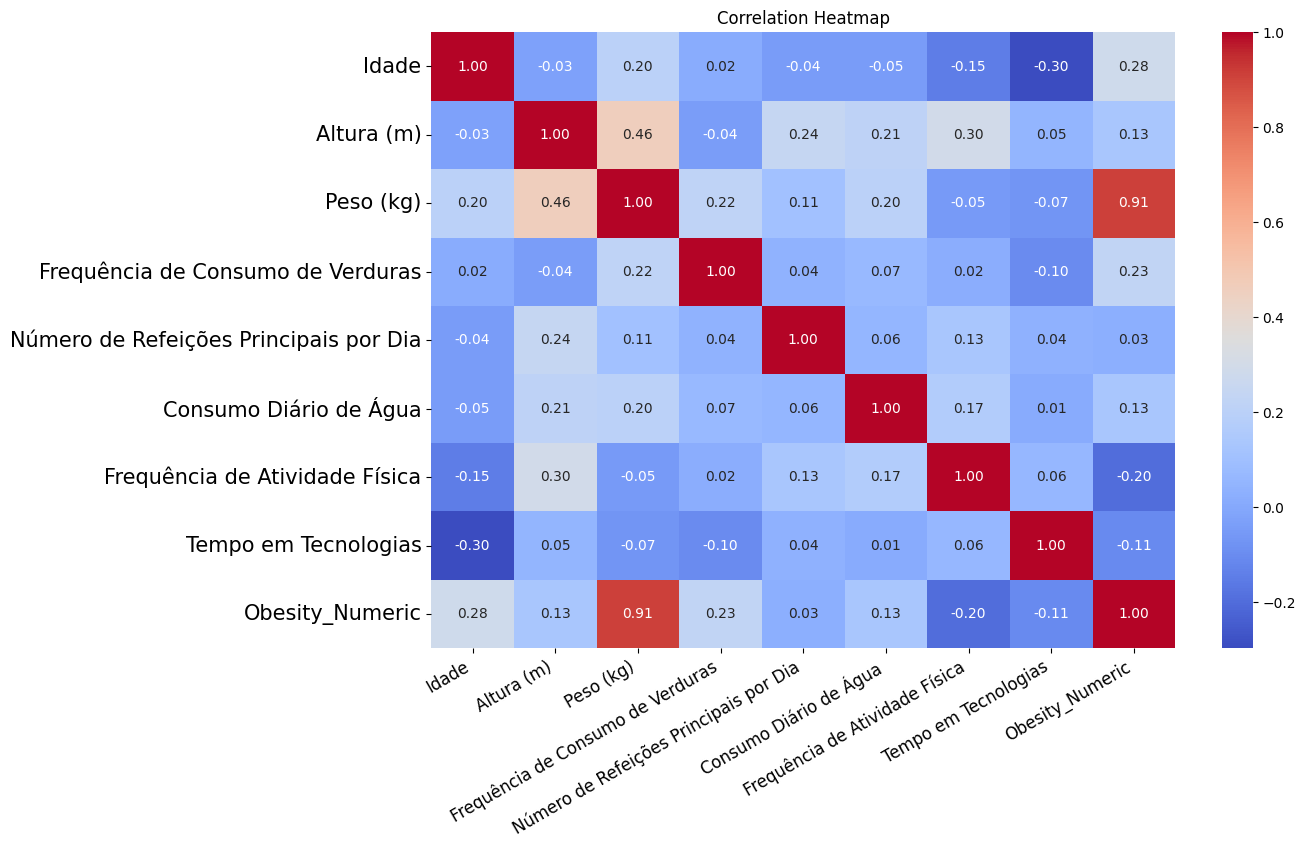

In [ ]:
# @title Corelação entre Variaveis Numéricas
plt.figure(figsize=(12, 8))

df_corr = pd.concat([quantiVars, df['Obesity_Numeric']], axis=1)
corr = df_corr.corr()
corr_with_obesity = corr['Obesity_Numeric'].drop('Obesity_Numeric')

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Aumentar o tamanho das legendas do eixo Y
plt.yticks(fontsize=15)

# Rotacionar as legendas do eixo X
plt.xticks(rotation=30, ha='right', fontsize=12)


plt.show()

### Gráfico de correlações

In [ ]:
# @title tabela de correlações

# prompt: Gere um código que crie um dataframe chamado correlation_df, com três colunas e 16 linhas, em que cada coluna representa um indice de correlação apresentado anteriormente (Pearson, Spearman e Kendall). E cada linha de correlation_df representa uma coluna do dataframe original de 1 a 16, sendo então os elementos desse dataframe os respectivos coeficientes de correlação entre as respectivas colunas e a ultima coluna (NObeyesdad).

# Crie listas para armazenar os coeficientes de correlação para cada método
pearson_corr = []
spearman_corr = []
kendall_corr = []

# Itere sobre as primeiras 16 colunas do DataFrame
# Certifique-se que 'Obesity_Numeric' foi criado anteriormente e existe no DataFrame
if 'Obesity_Numeric' in df.columns:
  for i in range(16):
    coluna_atual = df.columns[i]

    # Verifica se a coluna atual é numérica antes de calcular a correlação
    if pd.api.types.is_numeric_dtype(df[coluna_atual]):
      # Calcula a correlação de Pearson
      corr_pearson = df[coluna_atual].corr(df['Obesity_Numeric'], method='pearson')
      pearson_corr.append(corr_pearson)

      # Calcula a correlação de Spearman
      corr_spearman = df[coluna_atual].corr(df['Obesity_Numeric'], method='spearman')
      spearman_corr.append(corr_spearman)

      # Calcula a correlação de Kendall
      corr_kendall = df[coluna_atual].corr(df['Obesity_Numeric'], method='kendall')
      kendall_corr.append(corr_kendall)

  # Crie o dataframe correlation_df
  correlation_df = pd.DataFrame(
      {
      'Pearson': pearson_corr,
      'Spearman': spearman_corr,
      'Kendall': kendall_corr,
      }
  )
#   }, index=range(1, 17)) # Indexando de 1 a 16 para representar as colunas

  print("\nDataFrame de Correlações:")
  print(correlation_df)
else:
  print("\nA coluna 'Obesity_Numeric' não foi encontrada. Por favor, execute a célula que a cria.")
  print("Certifique-se de que o mapeamento de 'NObeyesdad' para numérico foi realizado com sucesso.")



DataFrame de Correlações:
    Pearson  Spearman   Kendall
0  0.284082  0.409386  0.293354
1  0.132625  0.125829  0.086998
2  0.913250  0.921324  0.783965
3  0.227901  0.260921  0.215790
4  0.026616 -0.052506 -0.024385
5  0.132979  0.148459  0.110508
6 -0.199840 -0.180491 -0.131191
7 -0.108000 -0.076567 -0.046045


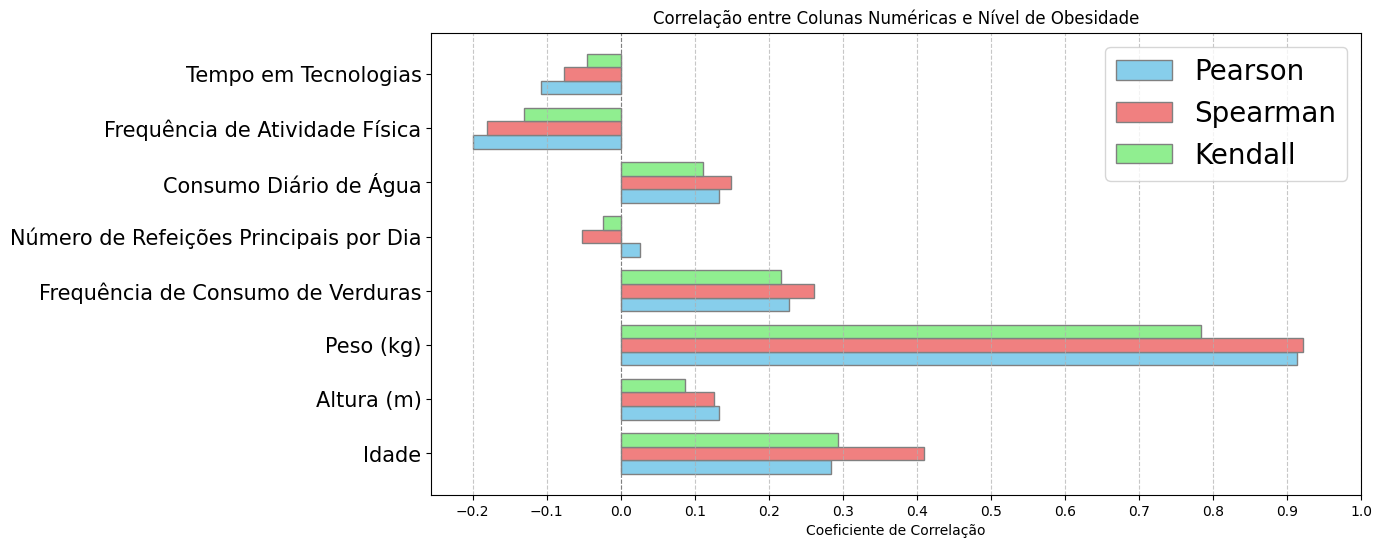

In [ ]:
# @title Gráficos de Correlações
# prompt: A partir do dataframe correlation_df, gere um grafico de colunas em que para cada elemento de x possui 3 colunas lado a lado para cada coluna. use apenas o elementos numéricos, no eixo x deve ser usado o nome das colunas.

# Gere o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

# Largura de cada barra
bar_height = 0.25  # Mudei de width para height para barras horizontais

# Posições para as barras no eixo y (para barras horizontais)
r1 = range(len(correlation_df.index))
r2 = [x + bar_height for x in r1]
r3 = [x + bar_height for x in r2]

# Crie as barras horizontais
ax.barh(r1, correlation_df['Pearson'].fillna(0), color='skyblue', height=bar_height, edgecolor='grey', label='Pearson')
ax.barh(r2, correlation_df['Spearman'].fillna(0), color='lightcoral', height=bar_height, edgecolor='grey', label='Spearman')
ax.barh(r3, correlation_df['Kendall'].fillna(0), color='lightgreen', height=bar_height, edgecolor='grey', label='Kendall')

# Adicione rótulos ao eixo y (para barras horizontais)
# Use os nomes das colunas numéricas do DataFrame original
# Filtrando apenas as colunas numéricas das primeiras 16
numeric_cols_names = [df.columns[i] for i in range(16) if pd.api.types.is_numeric_dtype(df.iloc[:, i])]
ax.set_yticks([r + bar_height for r in range(len(numeric_cols_names))])
ax.set_yticklabels(numeric_cols_names, fontsize=15) # Rótulos no eixo y agora

# Adicione rótulos e título
ax.set_xlabel('Coeficiente de Correlação') # Eixo x agora é a correlação
# ax.set_ylabel('Colunas Numéricas')       # Eixo y agora são as colunas
ax.set_title('Correlação entre Colunas Numéricas e Nível de Obesidade')

# Define os ticks do eixo X com passo de 0.1
ax.set_xticks(np.arange(-0.2, 1.1, 0.1))
# ax.tick_params(axis='x', labelsize=15)

# Adiciona um grid vertical
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adicione a legenda
ax.legend(fontsize=20)

# Adiciona uma linha vertical no 0 para referência
ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Mostre o gráfico
plt.show()

# Cálculo e Distribuição do IMC

In [ ]:
# prompt: Crie pra mim o código que crie uma séria contendo o IMC para cada linha do dataframe, o IMC é calculado a partir da divisão do peso pela (altura ao quadrado)

# Calcule o IMC para cada linha do DataFrame
df['IMC'] = df['Peso (kg)'] / (df['Altura (m)']**2)

# Exiba as primeiras linhas do DataFrame com a nova coluna 'IMC'
print(df[['Peso (kg)', 'Altura (m)', 'IMC']].head())

# Crie uma série contendo apenas o IMC
serie_imc = df['IMC']

# Exiba a série
print("\nSérie contendo o IMC:")
print(serie_imc.head())

   Peso (kg)  Altura (m)        IMC
0       64.0        1.62  24.386526
1       56.0        1.52  24.238227
2       77.0        1.80  23.765432
3       87.0        1.80  26.851852
4       89.8        1.78  28.342381

Série contendo o IMC:
0    24.386526
1    24.238227
2    23.765432
3    26.851852
4    28.342381
Name: IMC, dtype: float64


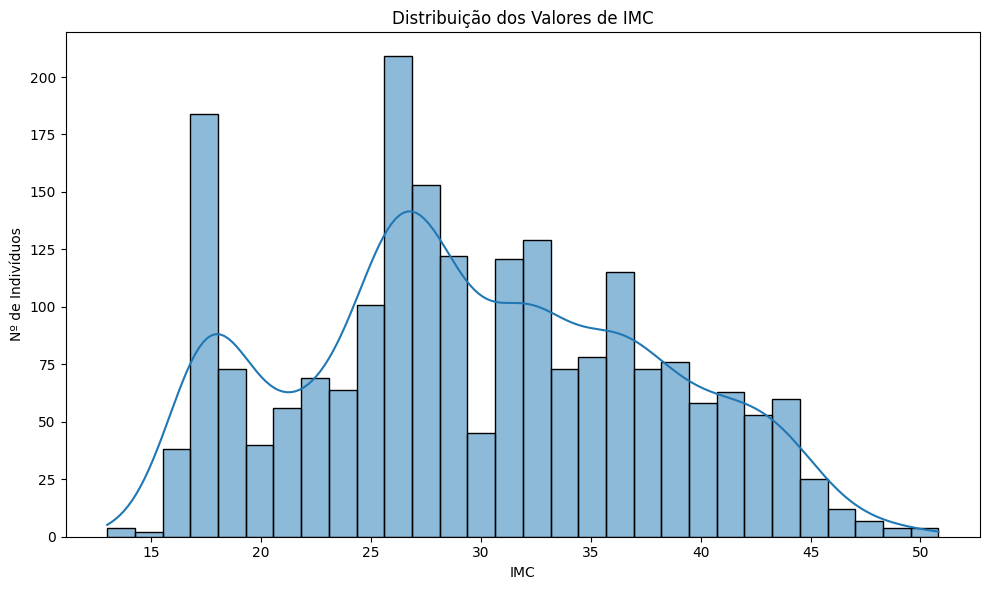

In [ ]:
# prompt: crie um gráfico do tipo histograma que mostra a distribuição dos valores da coluna do IMC

# Histograma para a distribuição do IMC
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='IMC', kde=True, bins=30) # Ajuste o número de bins conforme necessário

plt.title('Distribuição dos Valores de IMC')
plt.xlabel('IMC')
plt.ylabel('Nº de Indivíduos')

plt.tight_layout()
plt.show()

In [ ]:
# prompt: crie um código que calcule a correlação entre a coluna IMC e a coluna Numeric Obesity

# Calcula a correlação de Pearson entre 'IMC' e 'Obesity_Numeric'
correlation_imc_obesity = df['IMC'].corr(df['Obesity_Numeric'], method='pearson')

print(f"A correlação de Pearson entre IMC e Nível de Obesidade Numérico é: {correlation_imc_obesity:.2f}")

A correlação de Pearson entre IMC e Nível de Obesidade Numérico é: 0.98


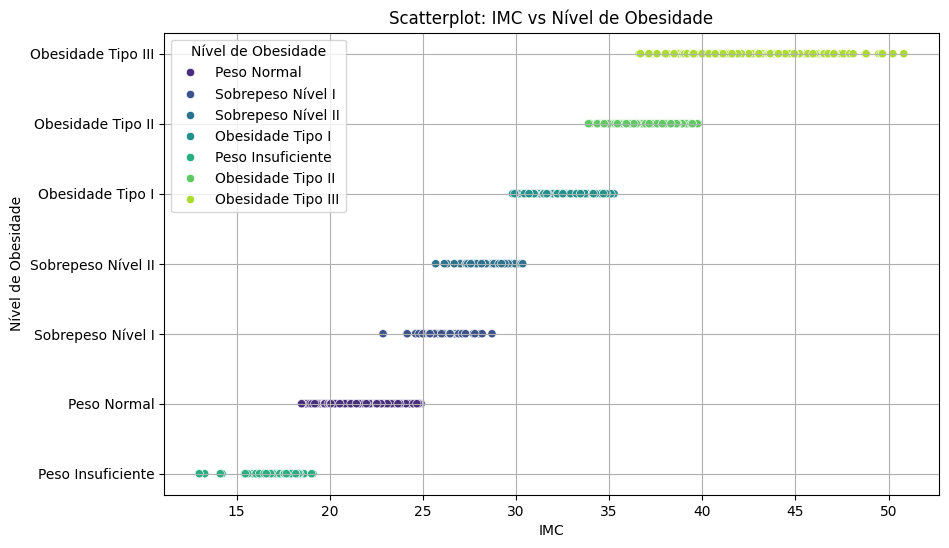

In [ ]:
# prompt: crie um scatterplot que mostre o IMC e o numéric Obesity

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='IMC', y='Obesity_Numeric', hue='Nível de Obesidade', palette='viridis') # 'hue' para colorir por nível de obesidade
plt.title('Scatterplot: IMC vs Nível de Obesidade')
plt.xlabel('IMC')
plt.ylabel('Nível de Obesidade')
plt.yticks(list(obesity_mapping.values()), list(obesity_mapping.keys())) # Adiciona rótulos aos ticks do eixo y
plt.grid(True)
plt.show()


In [ ]:
# Mapear 'Consumo Entre Refeições' para valores numéricos ordenados
# Definindo a ordem das categorias e seus valores numéricos correspondentes
caec_mapping = {
    'Não': 0,
    'Raramente': 1,
    'Frequentemente': 2,
    'Sempre': 3
}

df['Consumo Entre Refeições_Numeric'] = df['Consumo Entre Refeições'].map(caec_mapping)

# Exibir as primeiras linhas com a nova coluna numérica
print("DataFrame com a coluna numérica para 'Consumo Entre Refeições':")
display(df[['Consumo Entre Refeições', 'Consumo Entre Refeições_Numeric', 'Nível de Obesidade', 'Obesity_Numeric']].head())

# Calcular o coeficiente de correlação de Pearson
correlation_caec_obesity = df['Consumo Entre Refeições_Numeric'].corr(df['Obesity_Numeric'], method='pearson')

print(f"\nO coeficiente de correlação de Pearson entre 'Consumo Entre Refeições' e 'Nível de Obesidade' é: {correlation_caec_obesity:.2f}")

DataFrame com a coluna numérica para 'Consumo Entre Refeições':


,Consumo Entre Refeições,Consumo Entre Refeições_Numeric,Nível de Obesidade,Obesity_Numeric
0,Raramente,1,Peso Normal,1
1,Raramente,1,Peso Normal,1
2,Raramente,1,Peso Normal,1
3,Raramente,1,Sobrepeso Nível I,2
4,Raramente,1,Sobrepeso Nível II,3



O coeficiente de correlação de Pearson entre 'Consumo Entre Refeições' e 'Nível de Obesidade' é: -0.33


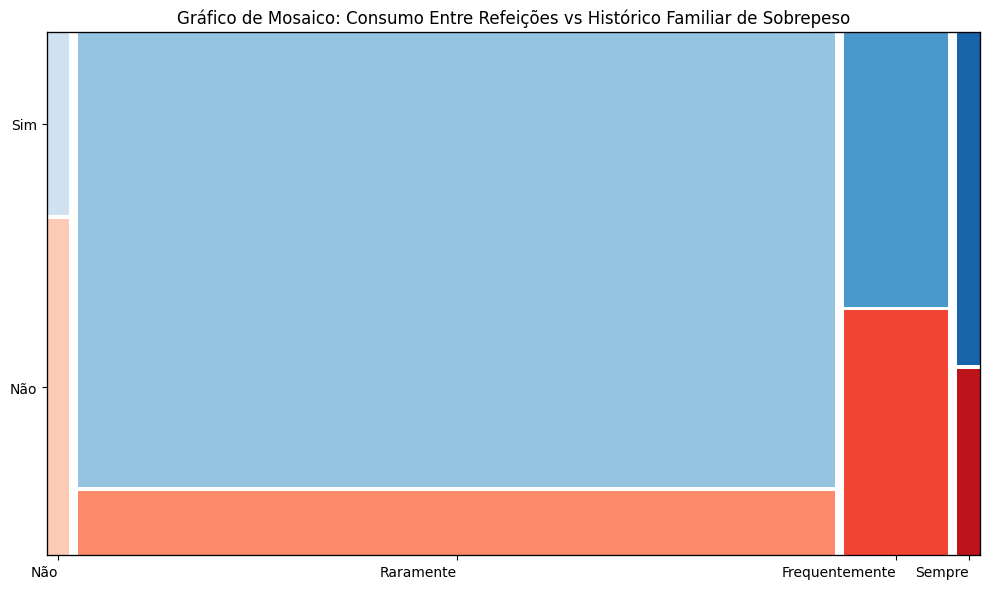

In [27]:
# @title Gráfico de Mosaico: Consumo Entre Refeições vs Histórico Familiar de Sobrepeso

col1 = 'Consumo Entre Refeições'
col2 = 'Histórico Familiar de Sobrepeso'

# Definir a ordem e mapeamento para as categorias de Consumo Entre Refeições
caec_order = ['Não', 'Raramente', 'Frequentemente', 'Sempre']
caec_mapping = {cat: i for i, cat in enumerate(caec_order)} # Mapeamento numérico para indexação

# Definir a ordem e mapeamento para as categorias de Histórico Familiar de Sobrepeso
fhwo_order = ['Não', 'Sim']
fhwo_mapping = {cat: i for i, cat in enumerate(fhwo_order)} # Mapeamento numérico para indexação

# Definir as paletas de cores para 'Sim' (Azul) e 'Não' (Vermelho)
# Usaremos 4 tonalidades para cada (uma para cada categoria de CAEC)
custom_palettes = {
    'Sim': sns.color_palette('Blues', len(caec_order)),
    'Não': sns.color_palette('Reds', len(caec_order)),
}

# Calcular as contagens para cada combinação de categorias
contagem = {}
for caec_cat in caec_order:
    for fhwo_cat in fhwo_order:
        count = df[(df[col1] == caec_cat) & (df[col2] == fhwo_cat)].shape[0] # Usando .shape[0] para contar
        contagem[(caec_cat, fhwo_cat)] = count


# Criar o dicionário de propriedades (props) para colorir o mosaico
props = {}
# Iterar pelas categorias da segunda variável (Histórico Familiar de Sobrepeso) primeiro para a paleta
for fhwo_cat in fhwo_order:
    # Iterar pelas categorias da primeira variável (Consumo Entre Refeições) para o mapeamento
    for caec_cat in caec_order:
        # Obter a cor da paleta correspondente à categoria de Histórico Familiar
        # e usar o índice da categoria de Consumo Entre Refeições para a tonalidade
        color = custom_palettes[fhwo_cat][caec_mapping[caec_cat]]
        # A chave no dicionário props deve ser a tupla de categorias na ordem que serão plotadas
        # Como a ordem no mosaic será [col1, col2], a chave é (caec_cat, fhwo_cat)
        props[(caec_cat, fhwo_cat)] = {'facecolor': color}


# Criar o gráfico de mosaico usando o dicionário de contagens
fig, ax = plt.subplots(figsize=(10, 6)) # Ajuste o tamanho conforme necessário

mosaic(contagem, # Usar o dicionário de contagens como dados
       index=[0, 1], # Especificar os índices das variáveis nas tuplas de contagem
       title=f'Gráfico de Mosaico: {col1} vs {col2}',
       ax=ax,
       properties=props, # Usar as propriedades de cor personalizadas
       labelizer=lambda k: '', # Remover rótulos internos para clareza
       gap=0.01 # Espaço entre os tiles
)

# Rotacionar os rótulos do eixo X para melhor legibilidade
for label in ax.get_xticklabels():
    # label.set_rotation(45)
    label.set_ha('right') # Alinhar à direita após rotação

plt.tight_layout() # Ajustar o layout
plt.show()

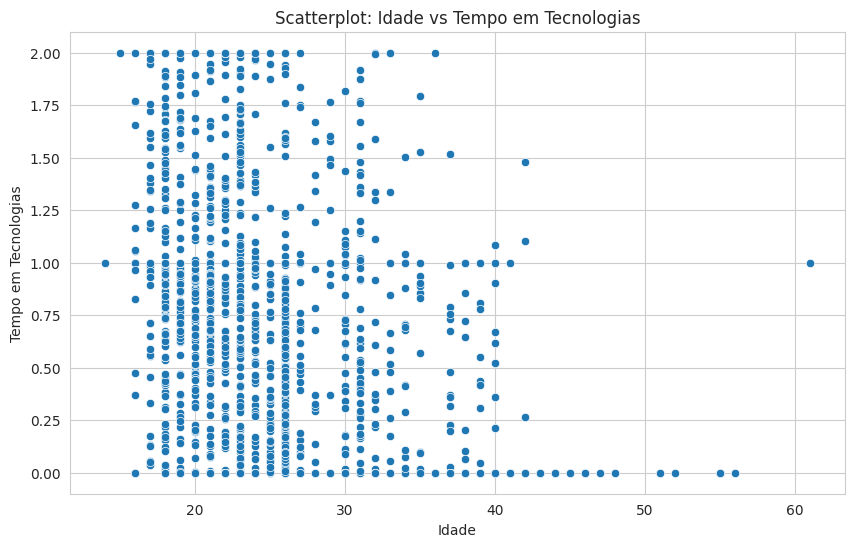

In [ ]:
# prompt: crie um scater plot relacionando a idade com o tmepo de uso de tecnologia, a idade deve ficar no eixo x

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Idade', y='Tempo em Tecnologias')

plt.title('Scatterplot: Idade vs Tempo em Tecnologias')
plt.xlabel('Idade')
plt.ylabel('Tempo em Tecnologias')

plt.grid(True)
plt.show()

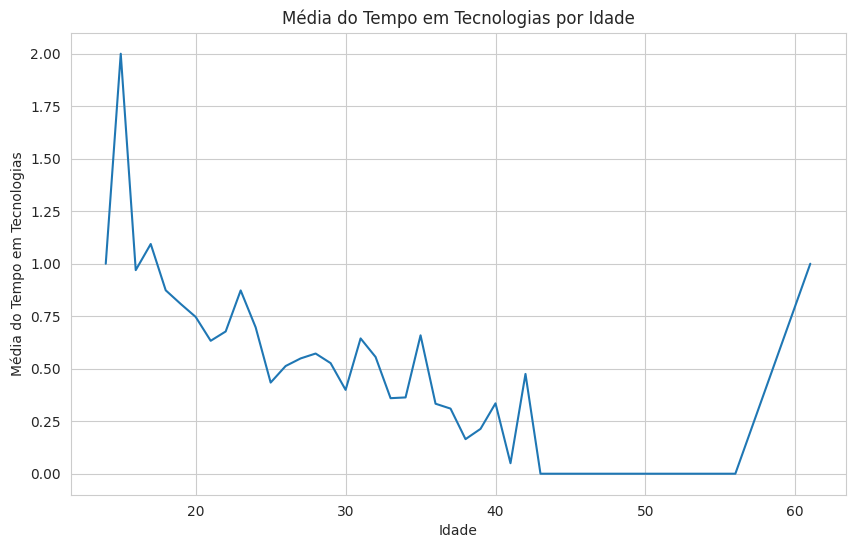

In [ ]:
# prompt: crie um gráfico de linha que mostre a média do tempo de tecnologia por idade

# Calcule a média de 'Tempo em Tecnologias' para cada 'Idade'
media_tempo_tecnologia_por_idade = df.groupby('Idade')['Tempo em Tecnologias'].mean().reset_index()

# Crie o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=media_tempo_tecnologia_por_idade, x='Idade', y='Tempo em Tecnologias')

plt.title('Média do Tempo em Tecnologias por Idade')
plt.xlabel('Idade')
plt.ylabel('Média do Tempo em Tecnologias')
plt.grid(True)
plt.show()


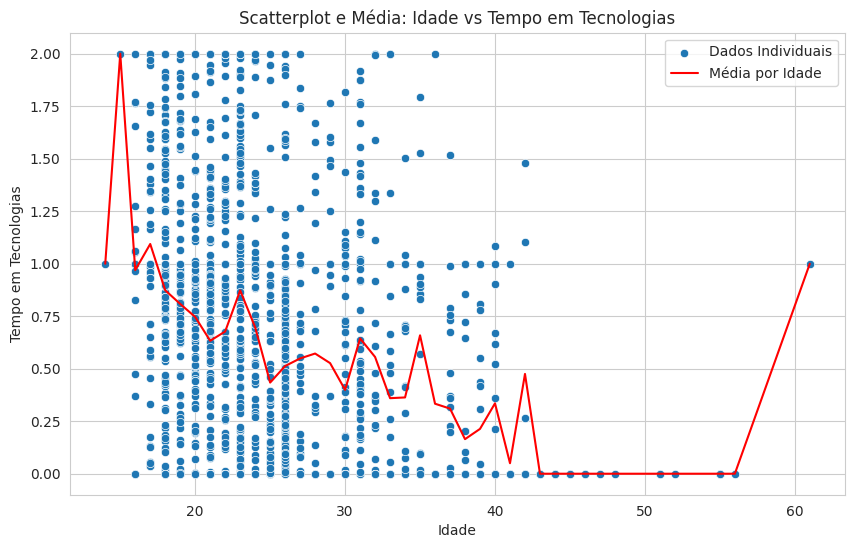

In [ ]:
# prompt: Sobreponha os dois ultimos gráficos

# Calcule a média de 'Tempo em Tecnologias' para cada 'Idade'
media_tempo_tecnologia_por_idade = df.groupby('Idade')['Tempo em Tecnologias'].mean().reset_index()

# Crie a figura e o eixo para sobrepor os gráficos
plt.figure(figsize=(10, 6))
ax = plt.gca() # Obtém o eixo atual

# Adiciona o scatterplot ao eixo
sns.scatterplot(data=df, x='Idade', y='Tempo em Tecnologias', ax=ax, label='Dados Individuais')

# Adiciona o lineplot (média) ao mesmo eixo
sns.lineplot(data=media_tempo_tecnologia_por_idade, x='Idade', y='Tempo em Tecnologias', ax=ax, color='red', label='Média por Idade')

plt.title('Scatterplot e Média: Idade vs Tempo em Tecnologias')
plt.xlabel('Idade')
plt.ylabel('Tempo em Tecnologias')

plt.grid(True)
plt.legend() # Mostra a legenda para identificar os dois gráficos
plt.show()


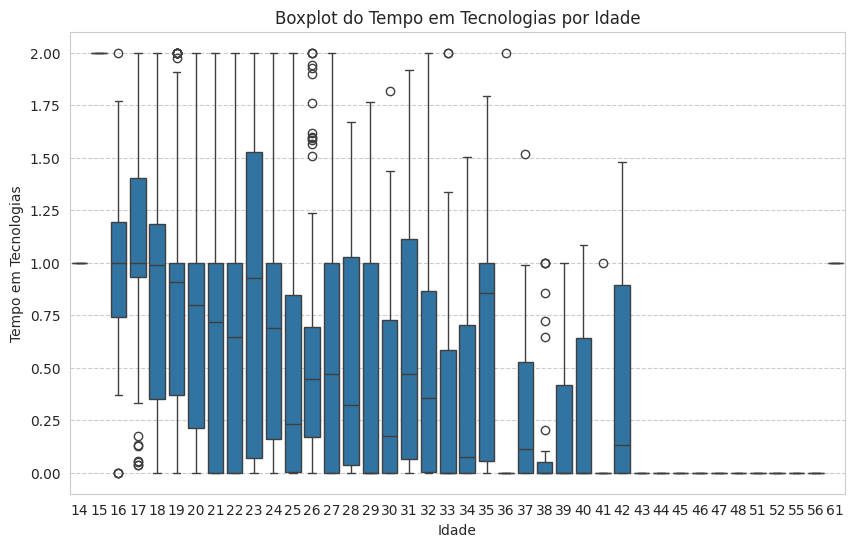

In [ ]:
# prompt: crie um gráfico de boxplot vertica do tempo de uso de tecnologias pela idade

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Idade', y='Tempo em Tecnologias', orient='v')

plt.title('Boxplot do Tempo em Tecnologias por Idade')
plt.xlabel('Idade')
plt.ylabel('Tempo em Tecnologias')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()


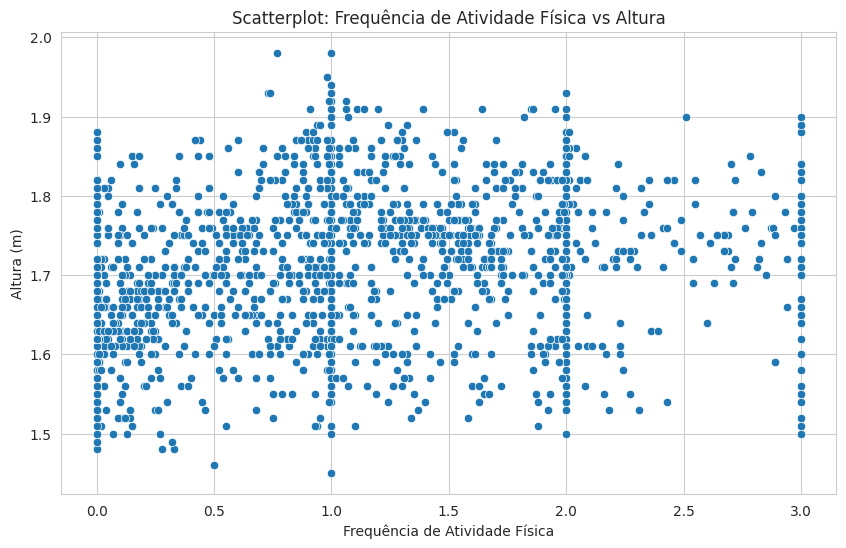

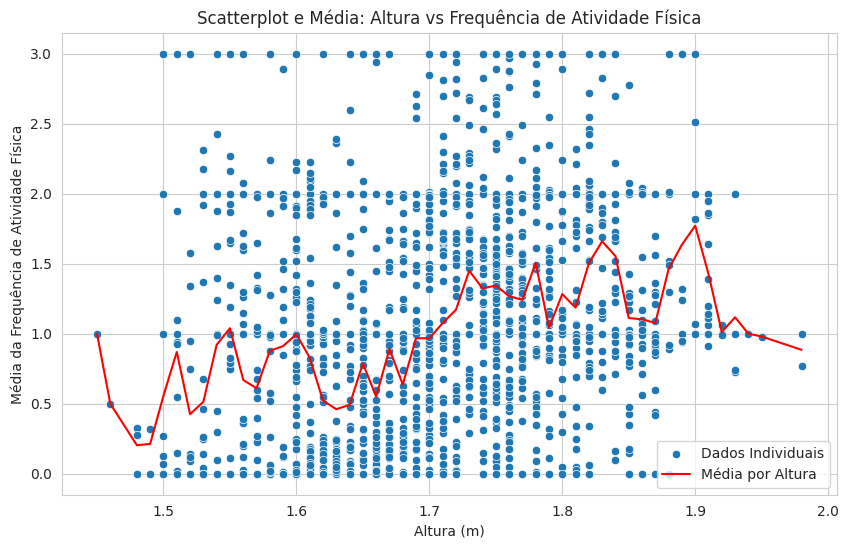

In [ ]:
# prompt: crie os dois ultimos gráficos relacionando as colunas pratica de atividade fisica e altura

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Frequência de Atividade Física', y='Altura (m)')

plt.title('Scatterplot: Frequência de Atividade Física vs Altura')
plt.xlabel('Frequência de Atividade Física')
plt.ylabel('Altura (m)')

plt.grid(True)
plt.show()

# Calcule a média de 'Frequência de Atividade Física' para cada 'Altura (m)'
media_faf_por_altura = df.groupby('Altura (m)')['Frequência de Atividade Física'].mean().reset_index()

# Crie a figura e o eixo para sobrepor os gráficos
plt.figure(figsize=(10, 6))
ax = plt.gca() # Obtém o eixo atual

# Adiciona o scatterplot ao eixo
sns.scatterplot(data=df, x='Altura (m)', y='Frequência de Atividade Física', ax=ax, label='Dados Individuais')

# Adiciona o lineplot (média) ao mesmo eixo
sns.lineplot(data=media_faf_por_altura, x='Altura (m)', y='Frequência de Atividade Física', ax=ax, color='red', label='Média por Altura')

plt.title('Scatterplot e Média: Altura vs Frequência de Atividade Física')
plt.xlabel('Altura (m)')
plt.ylabel('Média da Frequência de Atividade Física')

plt.grid(True)
plt.legend() # Mostra a legenda para identificar os dois gráficos
plt.show()

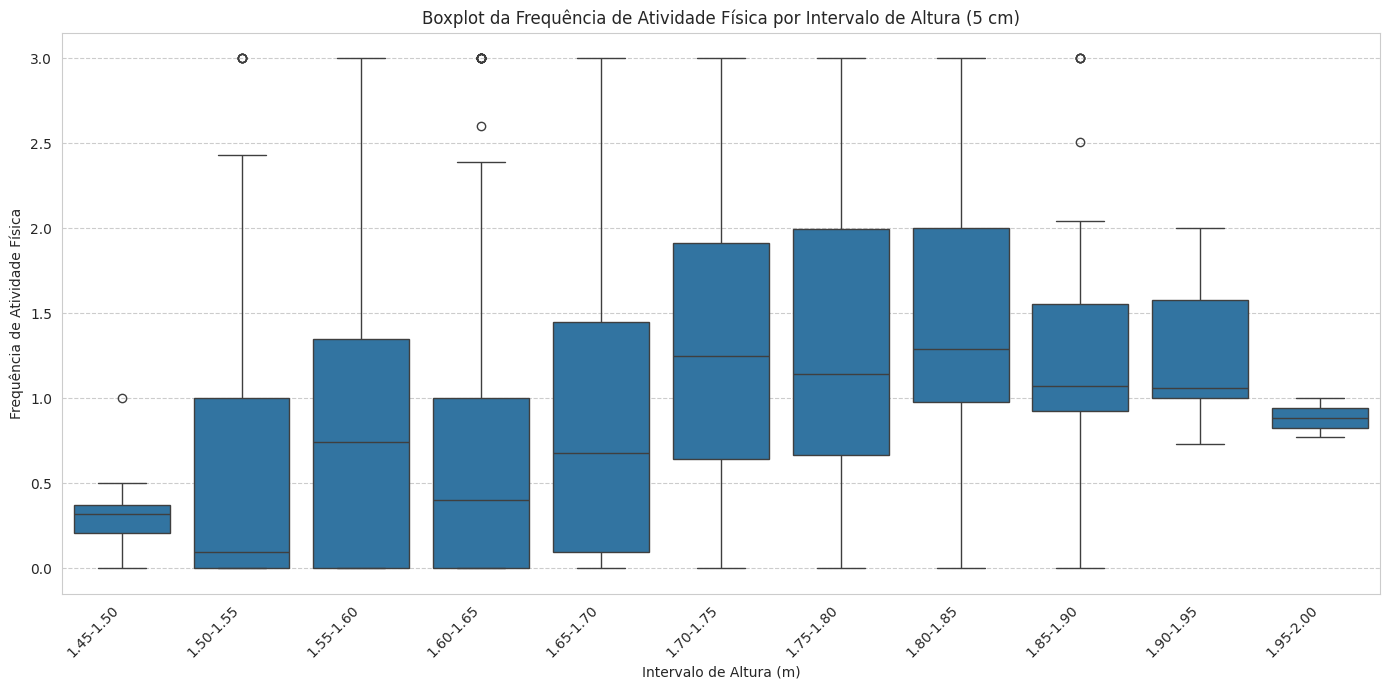

In [ ]:
# prompt: e agora um com boxplot relacionando media de ativiade fisica e altura, sendo altura o exixo x, coloque os espaços englobando a cada 5 cm

# Criar intervalos de Altura a cada 5 cm (0.05 metros)
# Encontre o valor mínimo e máximo da Altura
min_altura = df['Altura (m)'].min()
max_altura = df['Altura (m)'].max()

# Crie os bins com um passo de 0.05 (5 cm)
# Arredonde para garantir que os limites dos bins sejam múltiplos de 0.05 e cubram toda a faixa
bins_altura = np.arange(np.floor(min_altura * 20) / 20, np.ceil(max_altura * 20) / 20 + 0.05, 0.05)

# Crie os rótulos para os intervalos dos bins (opcional, mas útil)
# Crie os rótulos como strings representando o intervalo, e.g., "1.50-1.55"
labels_altura = [f'{bins_altura[i]:.2f}-{bins_altura[i+1]:.2f}' for i in range(len(bins_altura)-1)]

# Crie uma nova coluna no DataFrame com os intervalos de Altura
# Use include_lowest=True para incluir o valor mínimo no primeiro bin
df['Altura_Intervalo'] = pd.cut(df['Altura (m)'], bins=bins_altura, labels=labels_altura, include_lowest=True, right=False)

# Ordene os intervalos de Altura para que o boxplot apareça na ordem correta
df['Altura_Intervalo'] = df['Altura_Intervalo'].cat.reorder_categories(labels_altura, ordered=True)


plt.figure(figsize=(14, 7)) # Ajuste o tamanho para acomodar mais boxplots
sns.boxplot(data=df, x='Altura_Intervalo', y='Frequência de Atividade Física', orient='v')

plt.title('Boxplot da Frequência de Atividade Física por Intervalo de Altura (5 cm)')
plt.xlabel('Intervalo de Altura (m)')
plt.ylabel('Frequência de Atividade Física')
plt.xticks(rotation=45, ha='right') # Rotacione os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y', linestyle='--')
plt.tight_layout() # Ajusta o layout para evitar sobreposição de rótulos
plt.show()

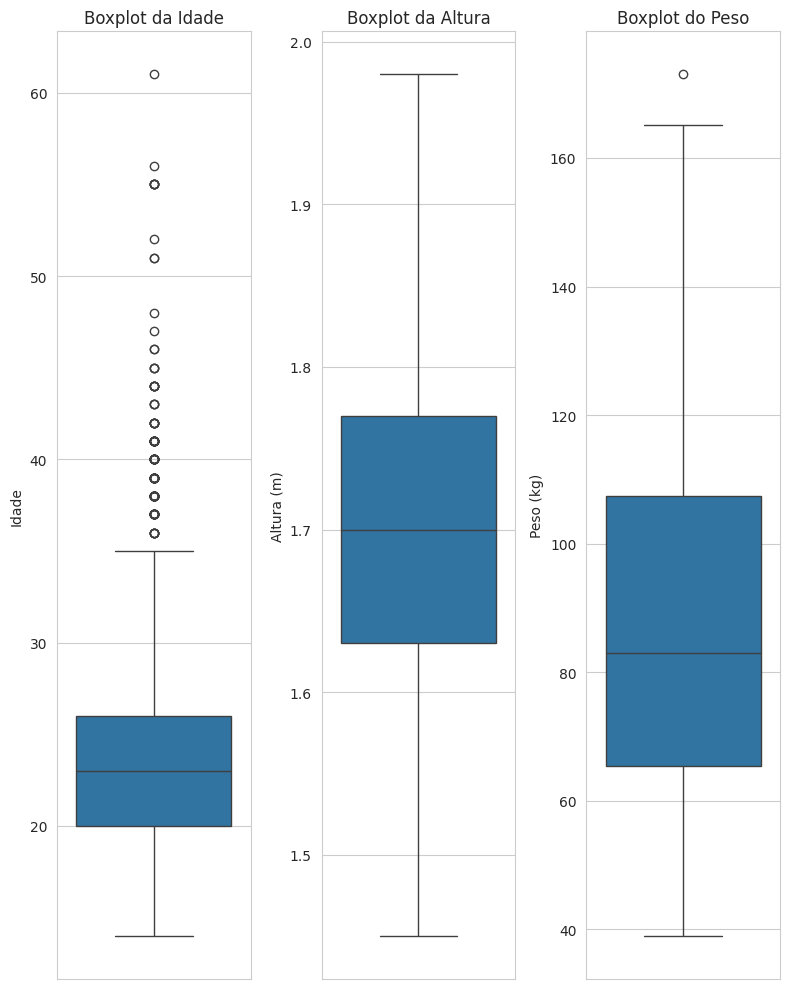

In [ ]:
#@title Boxplot

# prompt: crie um gráfico de boxplot na vertical para  a colunas idade, altura e peso, coloque os três gráfico agrupados na mesma imagem

# Crie a figura e os subplots
fig, axes = plt.subplots(1, 3, figsize=(8, 10), sharey=False) # sharey=False permite diferentes escalas Y

# Boxplot para Idade
sns.boxplot(data=df, y='Idade', orient='v', ax=axes[0])
axes[0].set_title('Boxplot da Idade')
axes[0].set_ylabel('Idade')
axes[0].set_xlabel('') # Remover rótulo do eixo x para evitar redundância

# Boxplot para Altura
sns.boxplot(data=df, y='Altura (m)', orient='v', ax=axes[1])
axes[1].set_title('Boxplot da Altura')
axes[1].set_ylabel('Altura (m)')
axes[1].set_xlabel('')

# Boxplot para Peso
sns.boxplot(data=df, y='Peso (kg)', orient='v', ax=axes[2])
axes[2].set_title('Boxplot do Peso')
axes[2].set_ylabel('Peso (kg)')
axes[2].set_xlabel('')


plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()
